<a href="https://www.kaggle.com/code/mlbysoham/crab-age-prediction-supervised-mls?scriptVersionId=138716068" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we imported libraries like 'numpy','pandas','matplotlib' and 'seaborn' for analyzing the dataset

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the data from the file

In [2]:
crab = pd.read_csv(r'/kaggle/input/crab-age-prediction/CrabAgePrediction.csv')
crab

#we read the csv file from the file location

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


# Data Cleaning

In [3]:
#getting a general information about the dataset

crab.info()

#this indicated that non of the columns had NULL values in them, future, the data in the columns are consistent
#the total number of unique data type used in the various columns are 'int','float' and 'object/string'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [4]:
crab.describe(include='all')

#again the data in the columns are consistent 
#as all the statistical values are correctly calculted, thus this indicated that there were no special symbols used
#in case of the columns 'Length','Diameter' and 'Height', the data entries are much clustered near their respective mean values
#Since there is a large standard deviation in case of the 'Weight' column, it can be assumed that
#the carb weights have huge variations and the mean-> '23.385217' is not a common value among them

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,NaN,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,NaN,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,NaN,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,NaN,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,NaN,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000


In [5]:
crab.dtypes

#this displays the data types in each column, can also be known from the 'info()'

Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

In [6]:
for i in crab.columns:
    print(i,'\n',crab[i].unique(),'\n')
    
#just a final check on all the values stored in each of the columns

Sex 
 ['F' 'M' 'I'] 

Length 
 [1.4375 0.8875 1.0375 1.175  1.55   1.3    1.325  1.5875 0.9125 0.825
 1.3625 0.8625 1.375  1.225  1.6375 1.6    1.0625 1.475  0.7625 1.1125
 1.625  0.925  0.575  1.2625 1.3375 1.525  1.575  1.0875 1.25   1.4875
 1.4    1.0125 0.75   1.05   0.8    1.7    1.5125 1.725  1.1375 1.8
 1.3125 1.775  0.6875 1.075  1.6125 1.6875 1.275  1.4625 0.7    0.875
 1.125  1.35   1.9375 1.85   1.5    1.2    1.425  0.7375 1.7375 1.5625
 1.5375 0.9875 0.675  1.65   0.975  1.2125 1.3875 0.775  0.9625 0.8375
 1.7875 1.1    1.     1.6625 1.7125 1.2875 1.1625 0.95   0.4625 1.1875
 1.675  1.15   1.75   1.025  0.725  0.9    1.4125 1.45   1.2375 1.8375
 1.825  0.7875 1.7625 0.35   0.9375 0.85   0.7125 0.6125 1.875  0.5875
 0.6    0.8125 1.8875 2.     1.95   0.45   0.6375 0.4875 0.625  1.8125
 0.3875 0.5    1.9    0.275  0.475  0.5625 0.65   0.55   0.525  0.4
 0.4125 0.375  1.8625 0.325  0.5375 0.5125 0.1875 0.425  2.0375 1.9125
 1.925  0.3375 0.6625 0.4375] 

Diameter 
 [1.175  0.6

# Data Analysis

/tmp/ipykernel_20/3610598272.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = crab.corr()


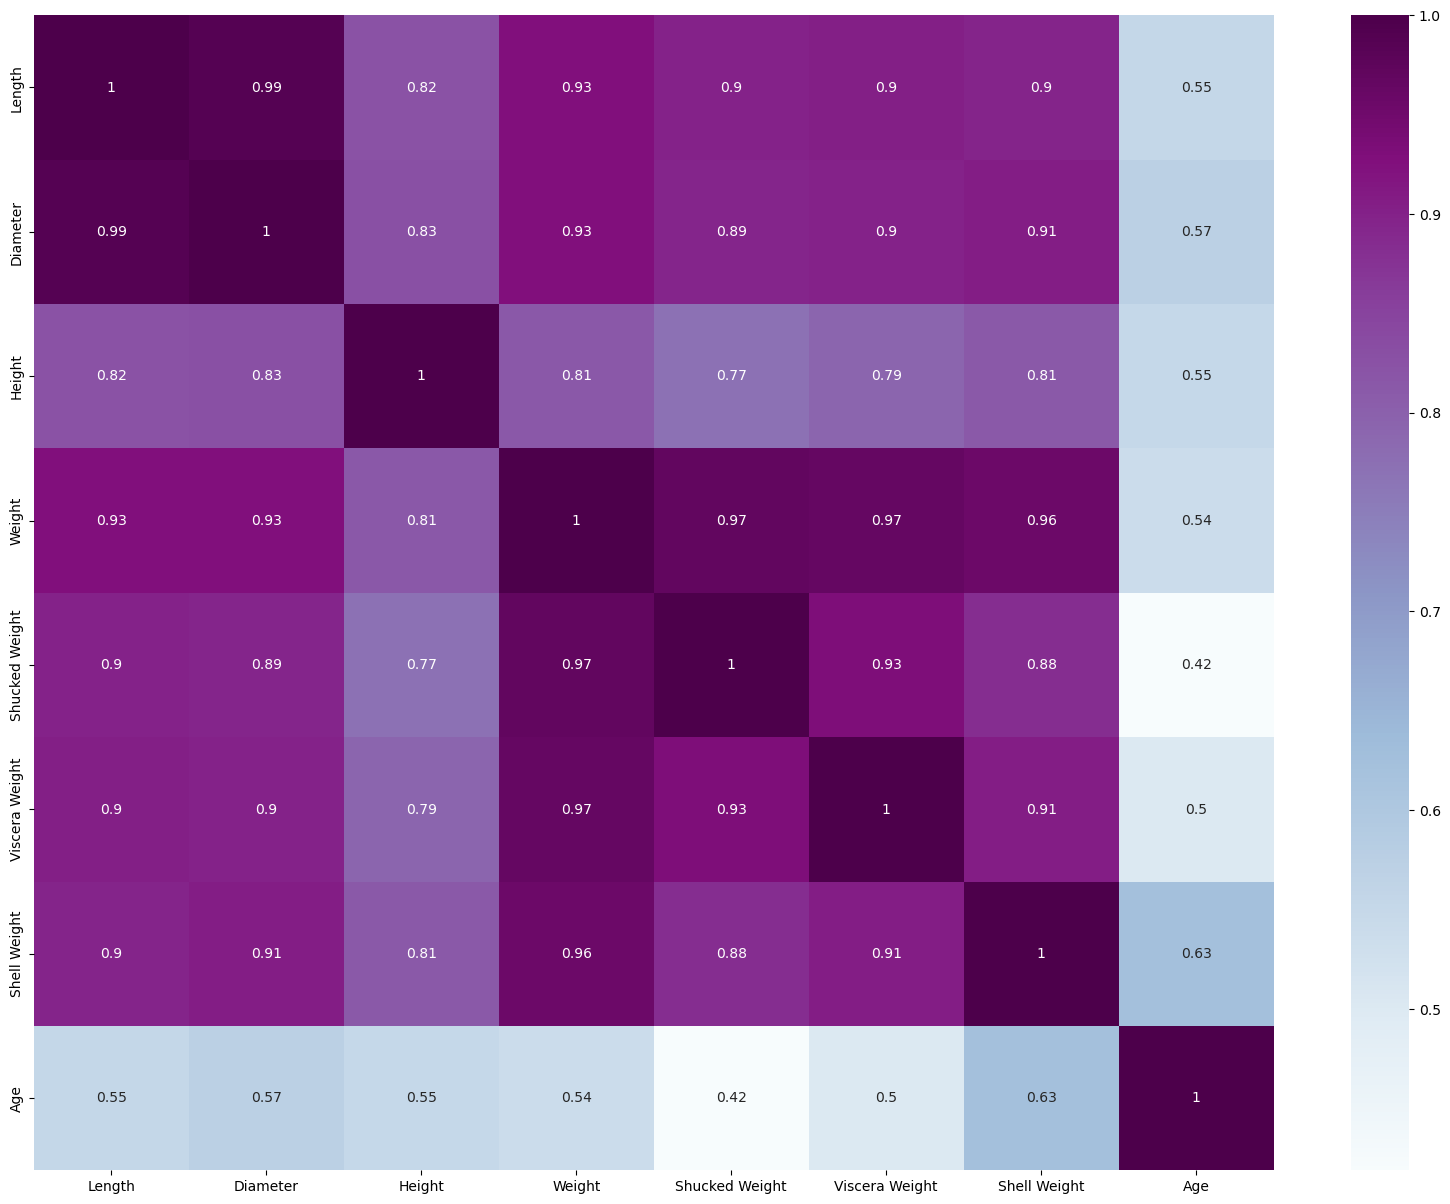

In [7]:
# heatmap analysis

plt.figure(figsize=(20,15))
cor = crab.corr()
sns.heatmap(cor,annot=True,cmap='BuPu')
plt.show()

#we find that the 'Age' column has high linear correlations with the other columns

In [8]:
#detecting the type of entries in the output column 'Age'

crab.Age.unique()

#there are a lot of unique values in the 'Age' column, all of type 'int64'

array([ 9,  6, 10,  8, 15, 13,  7, 11, 12,  5, 20, 17,  4, 19, 26, 14, 23,
       18, 16,  3, 24, 21,  2,  1, 22, 29, 25, 27])

In [9]:
crab.Age.nunique()

#there a lot of 28 unique values, thus the data in the 'Age' column can be considered as continous

28

### Analysis between Sex and Age columns

In [10]:
#detecting the type of entries in the output column 'Sex'

crab.Sex.unique()

#'Sex' column has only 3 unique entries, thus is categorical in nature

array(['F', 'M', 'I'], dtype=object)

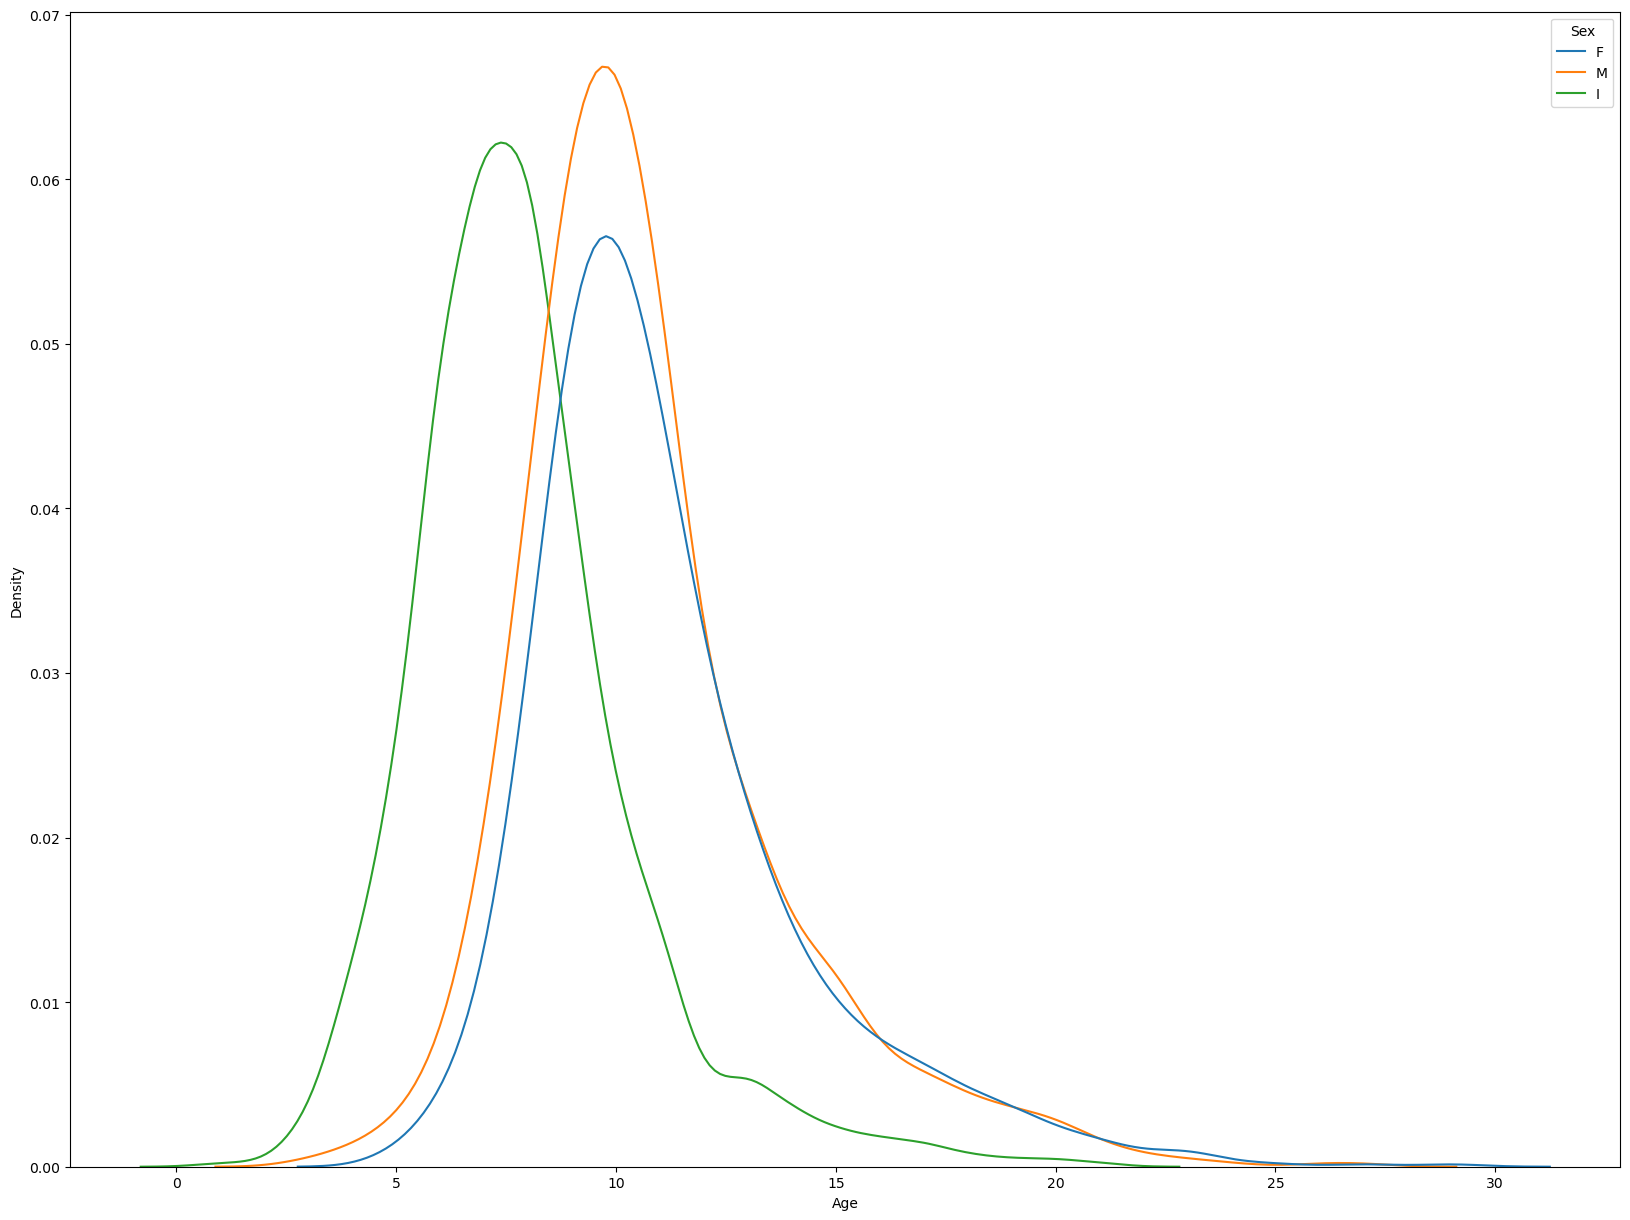

In [11]:
#using kde plot for the the analysis 
plt.figure(figsize=(20,15))
sns.kdeplot(x=crab.Age,hue=crab.Sex,data=crab)
plt.show()

#the kde plot shows a visible variation with different values of 'Sex'
#the plots for the values of 'M' and 'F' are much similar, and show slight deviaiton from each other
#the plot for 'I' deviates much from the other plots
#the peak for 'I' can be observed near the 'Age' value of 7 and for 'M' and 'F' peaks are near 11 value of 'Age'

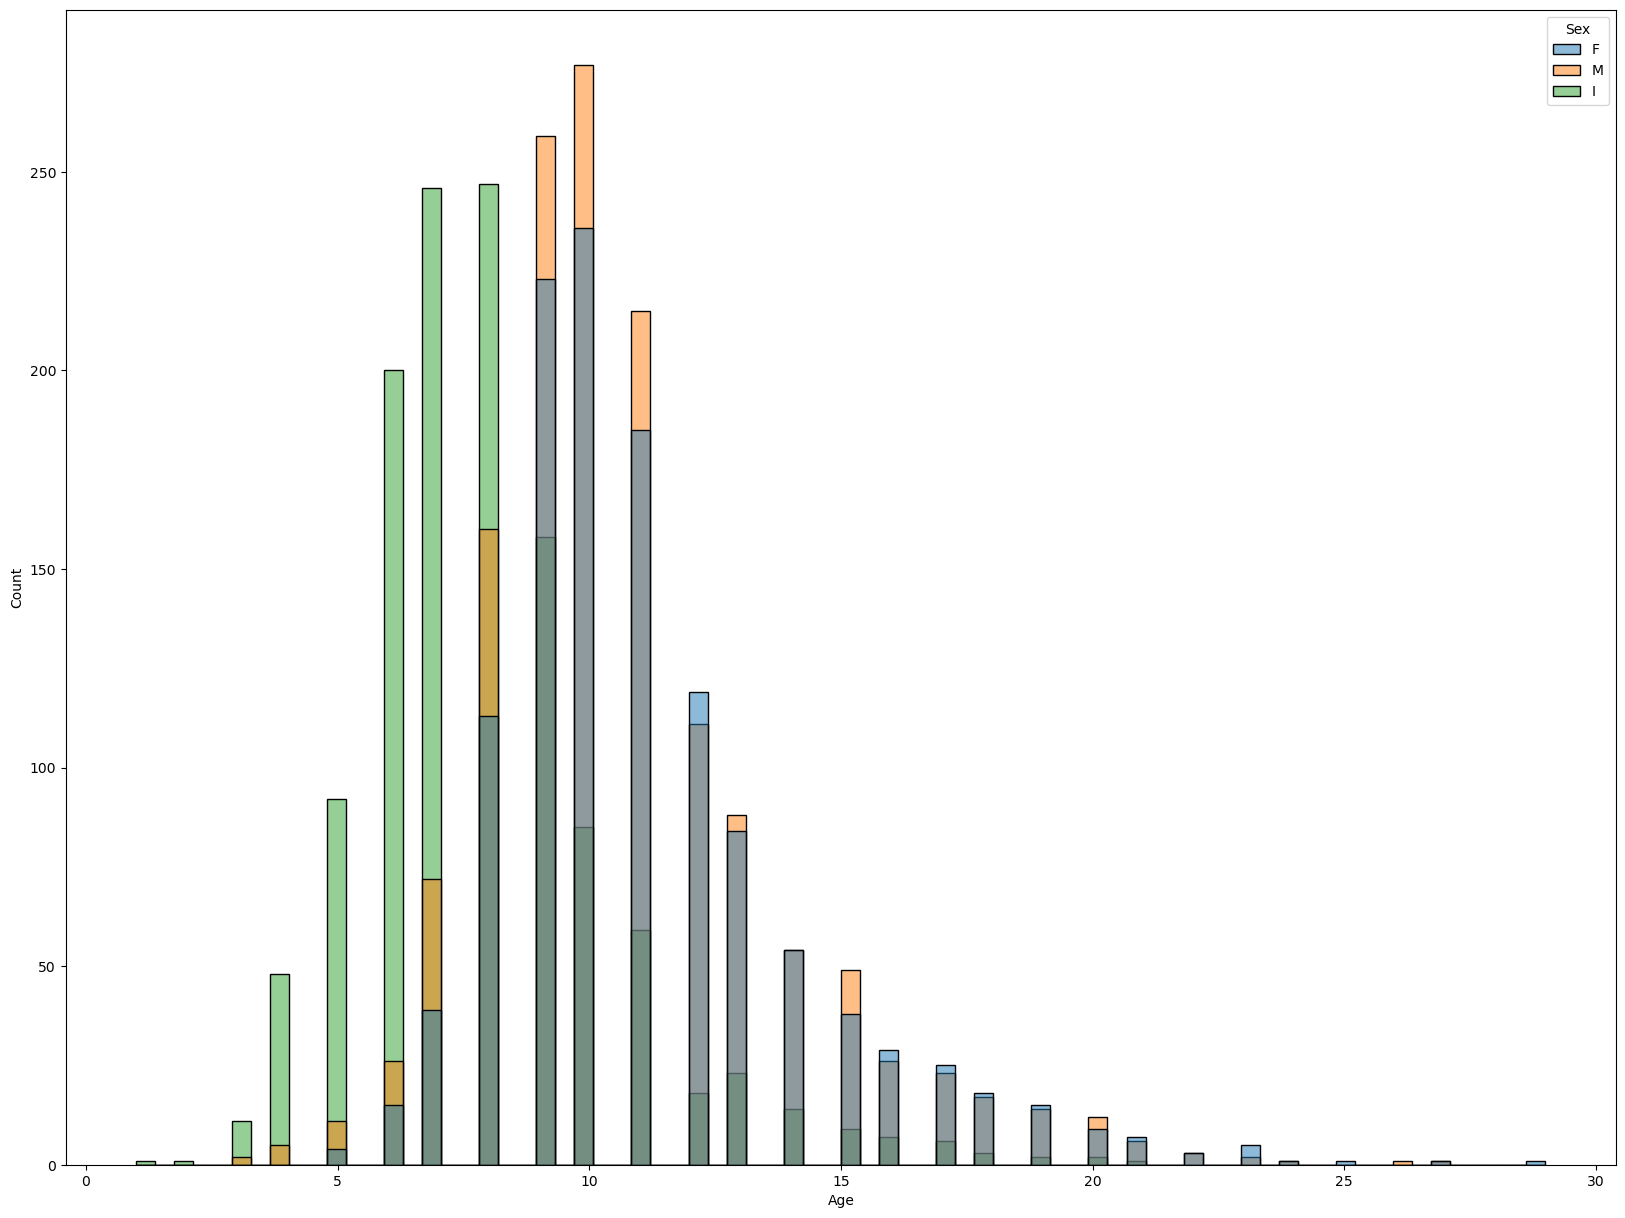

In [12]:
#using histogram plot for the the analysis 
plt.figure(figsize=(20,15))
sns.histplot(x=crab.Age,hue=crab.Sex,data=crab)
plt.show()

#the histogram plot has much merged data plots, thus a variation can not be judged properly
#but upon close look, we can find a variation in the plots of 'I' and that of 'M' and 'F'
#a clear analysis for the peaks of 'I', 'M' and 'F' is possible
#the plot for 'I' deviates much from the other plots
#the peak for 'I' can be observed at the 'Age' value of 8 and for 'M' and 'F' peaks are at 11 value of 'Age'

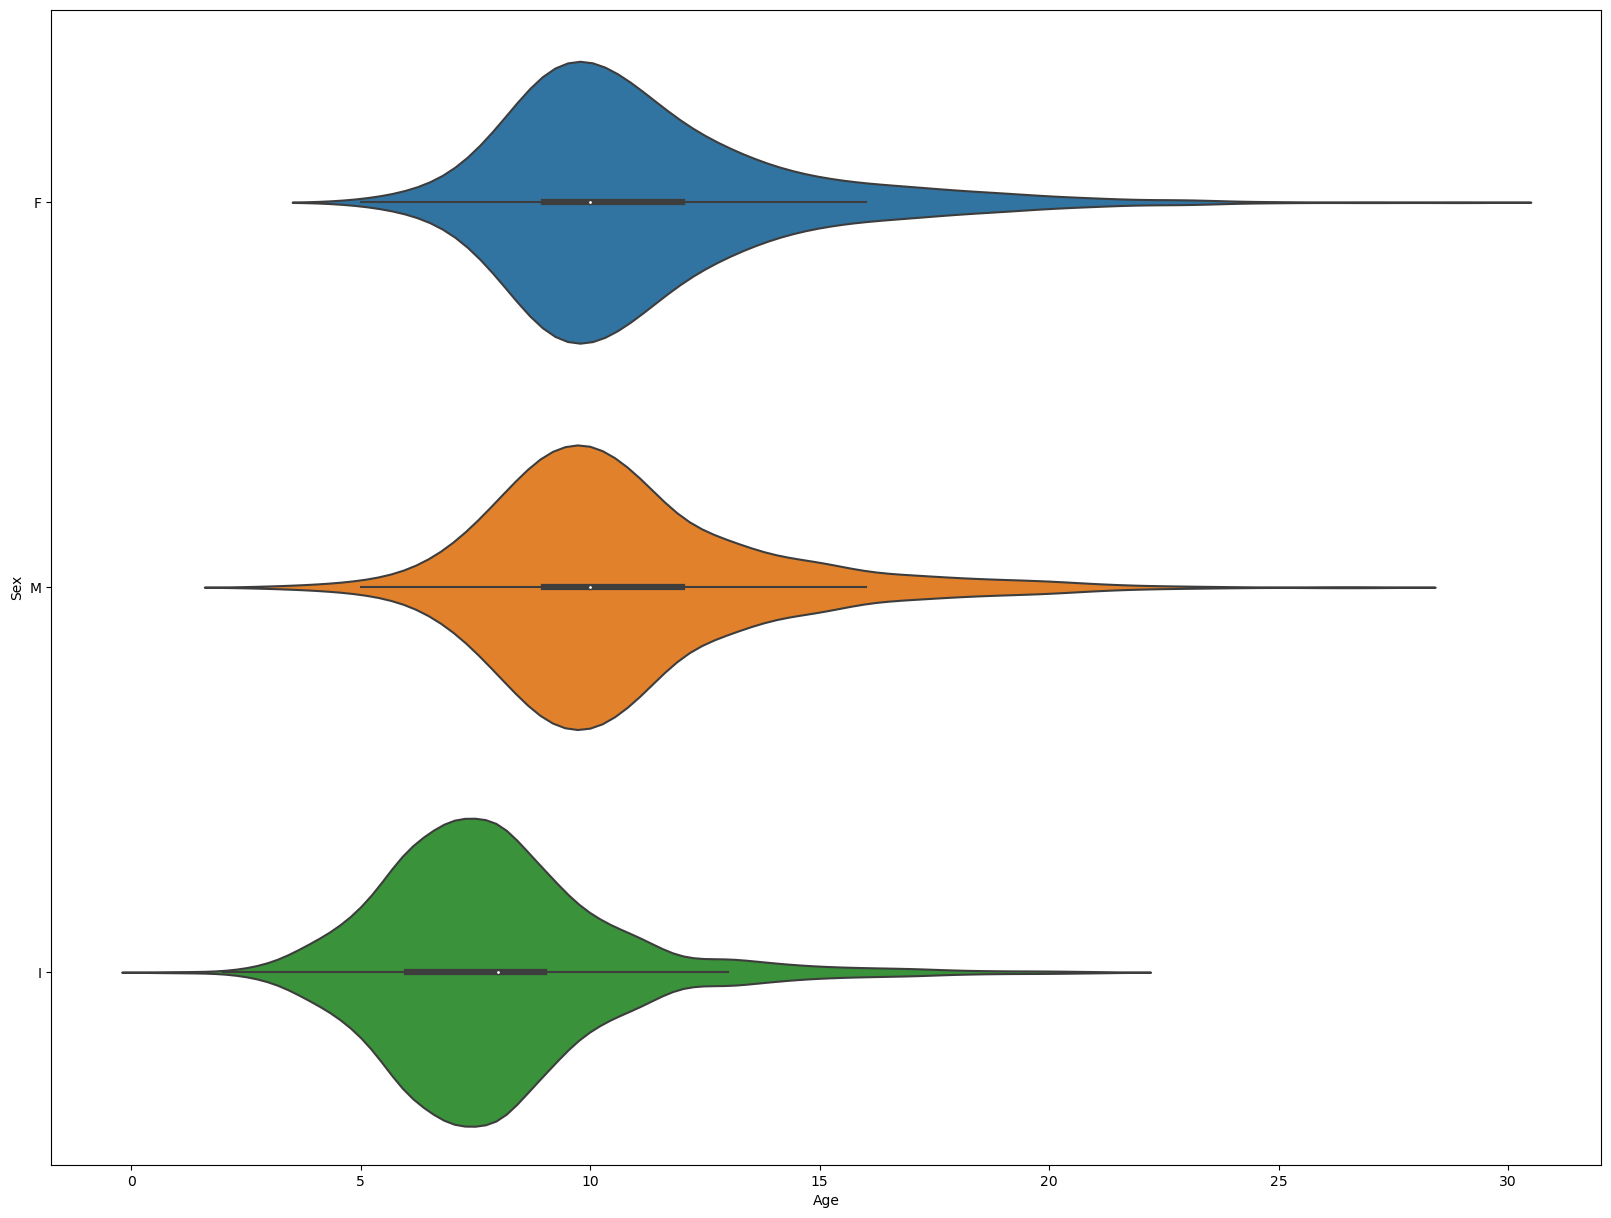

In [13]:
#using histogram plot for the the analysis 
plt.figure(figsize=(20,15))
sns.violinplot(x=crab.Age,y=crab.Sex,data=crab)
plt.show()

#the violin plot also showed a clear variation of the data between the attributes 'Sex' and 'Age'

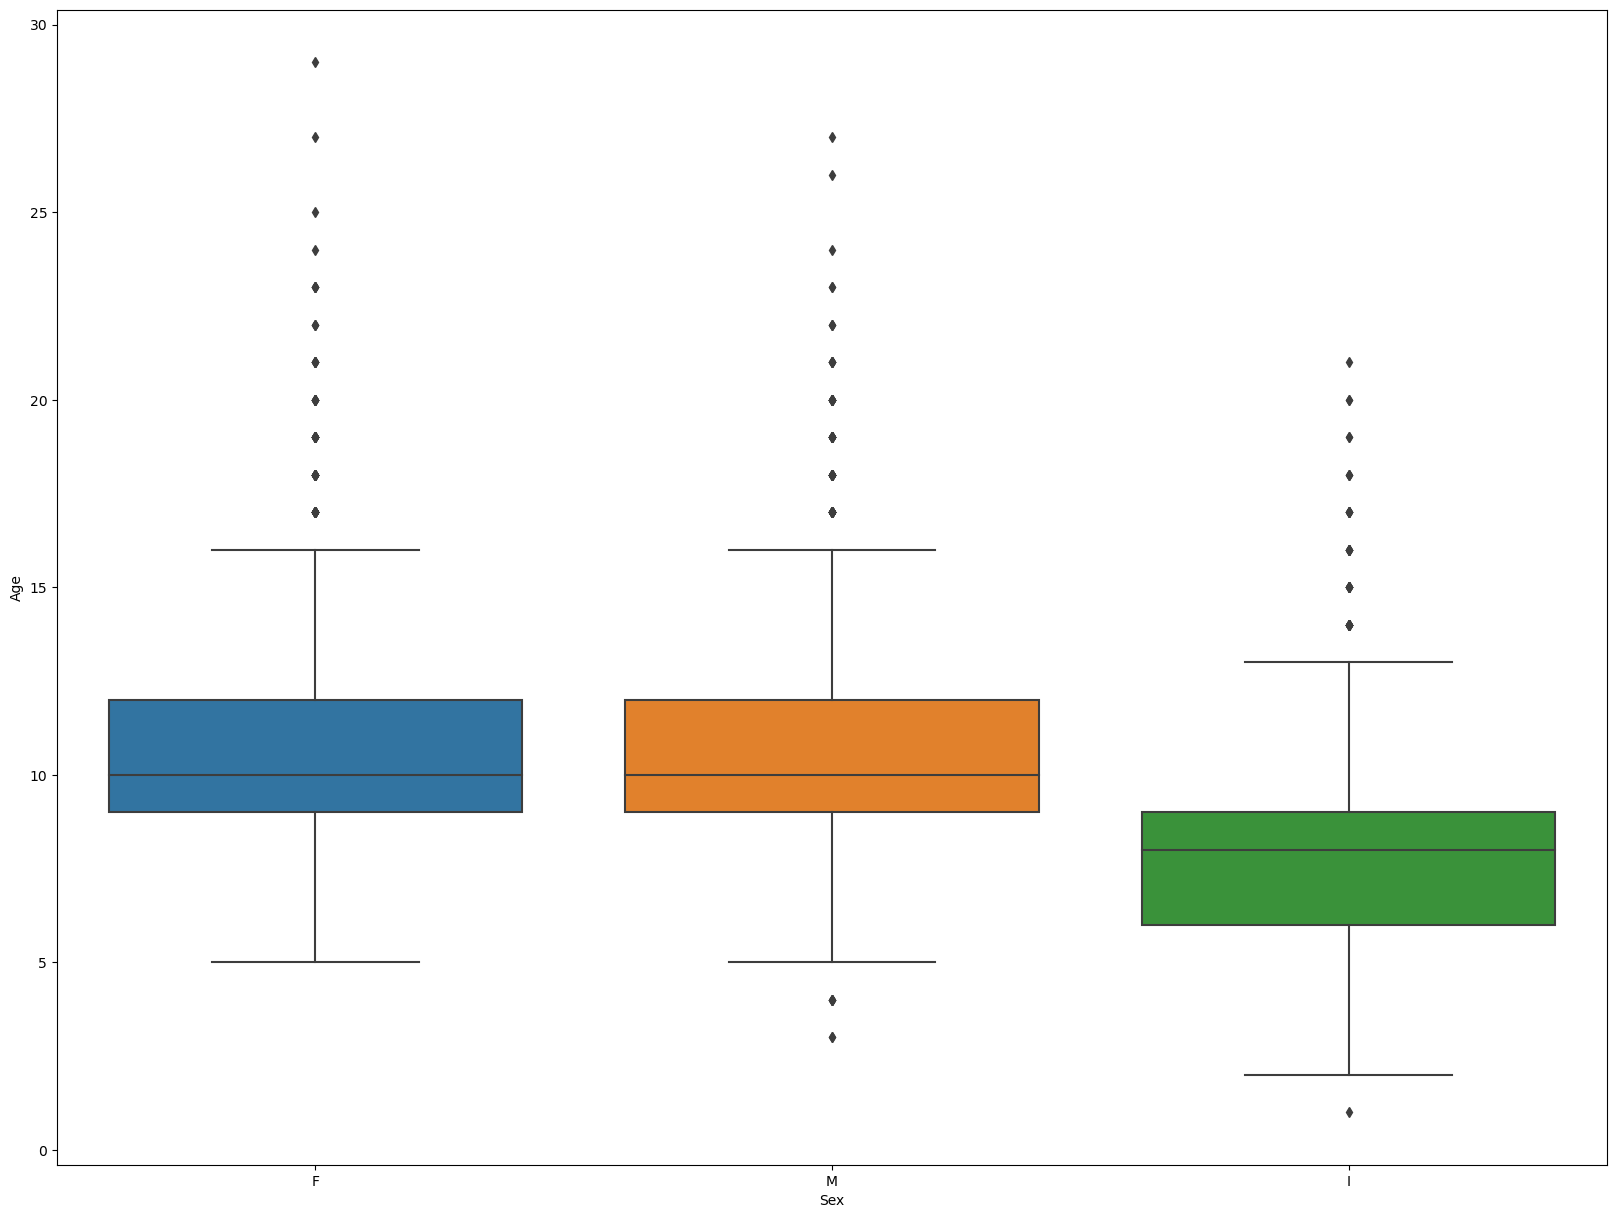

In [14]:
#using boxplot for the analysis
plt.figure(figsize=(20,15))
sns.boxplot(x=crab.Sex,y=crab.Age,data=crab)
plt.show()

#all the categories of 'Sex' have outliers, while the category of 'F' has no botttom outliers
#the analysis of 'mean' of all the 3 categories of the 'Sex' attribute show their high variations

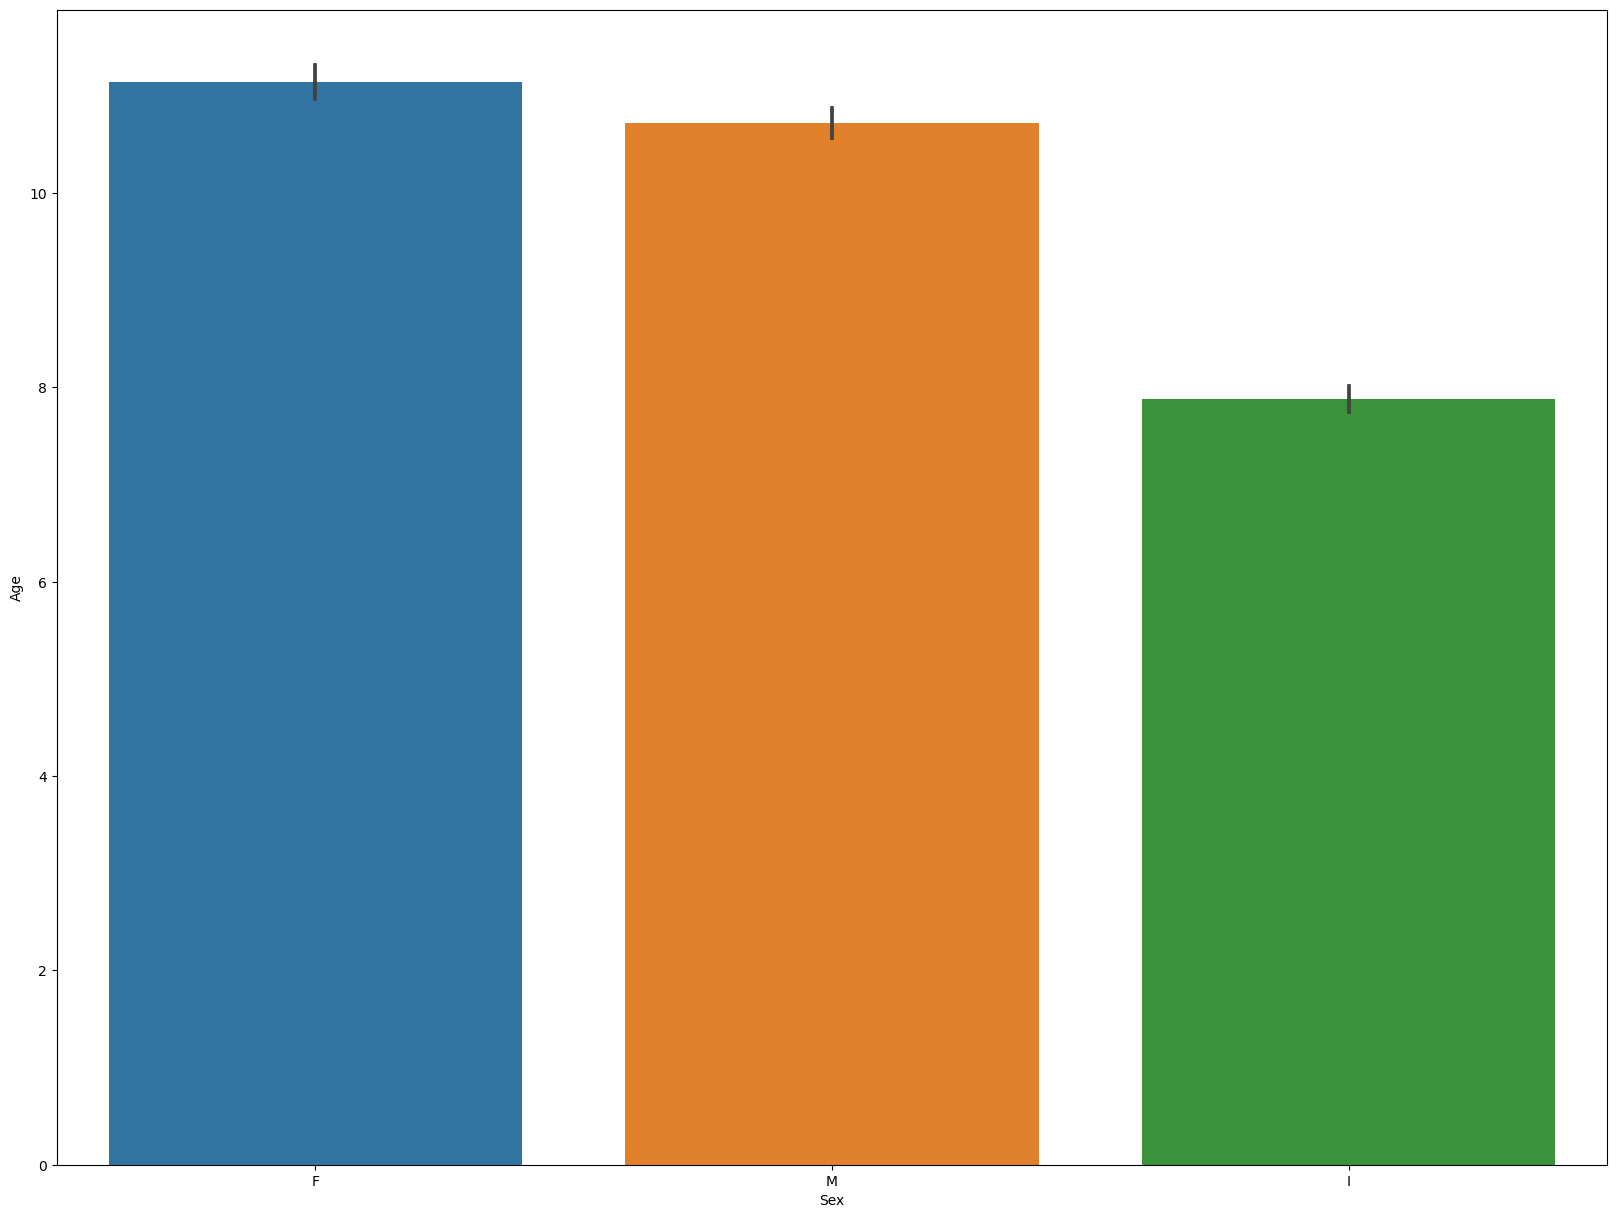

In [15]:
#using bar plot for the the analysis 
plt.figure(figsize=(20,15))
sns.barplot(x=crab.Sex,y=crab.Age,data=crab)
plt.show()

#It can be seen that the 'F' crabs have the highest age among all other 'Age' categories

#based on the analysis from KDE, Histogram and Bar plots we keep the data from the 'Sex' attribute

### Analysis between Length and Age

In [16]:
#detecting the type of entries in the output column 'Length'

crab.Length.unique()

#the unqiue entries in the 'Length' attribute states that it contains continuous data points

array([1.4375, 0.8875, 1.0375, 1.175 , 1.55  , 1.3   , 1.325 , 1.5875,
       0.9125, 0.825 , 1.3625, 0.8625, 1.375 , 1.225 , 1.6375, 1.6   ,
       1.0625, 1.475 , 0.7625, 1.1125, 1.625 , 0.925 , 0.575 , 1.2625,
       1.3375, 1.525 , 1.575 , 1.0875, 1.25  , 1.4875, 1.4   , 1.0125,
       0.75  , 1.05  , 0.8   , 1.7   , 1.5125, 1.725 , 1.1375, 1.8   ,
       1.3125, 1.775 , 0.6875, 1.075 , 1.6125, 1.6875, 1.275 , 1.4625,
       0.7   , 0.875 , 1.125 , 1.35  , 1.9375, 1.85  , 1.5   , 1.2   ,
       1.425 , 0.7375, 1.7375, 1.5625, 1.5375, 0.9875, 0.675 , 1.65  ,
       0.975 , 1.2125, 1.3875, 0.775 , 0.9625, 0.8375, 1.7875, 1.1   ,
       1.    , 1.6625, 1.7125, 1.2875, 1.1625, 0.95  , 0.4625, 1.1875,
       1.675 , 1.15  , 1.75  , 1.025 , 0.725 , 0.9   , 1.4125, 1.45  ,
       1.2375, 1.8375, 1.825 , 0.7875, 1.7625, 0.35  , 0.9375, 0.85  ,
       0.7125, 0.6125, 1.875 , 0.5875, 0.6   , 0.8125, 1.8875, 2.    ,
       1.95  , 0.45  , 0.6375, 0.4875, 0.625 , 1.8125, 0.3875, 0.5   ,
      

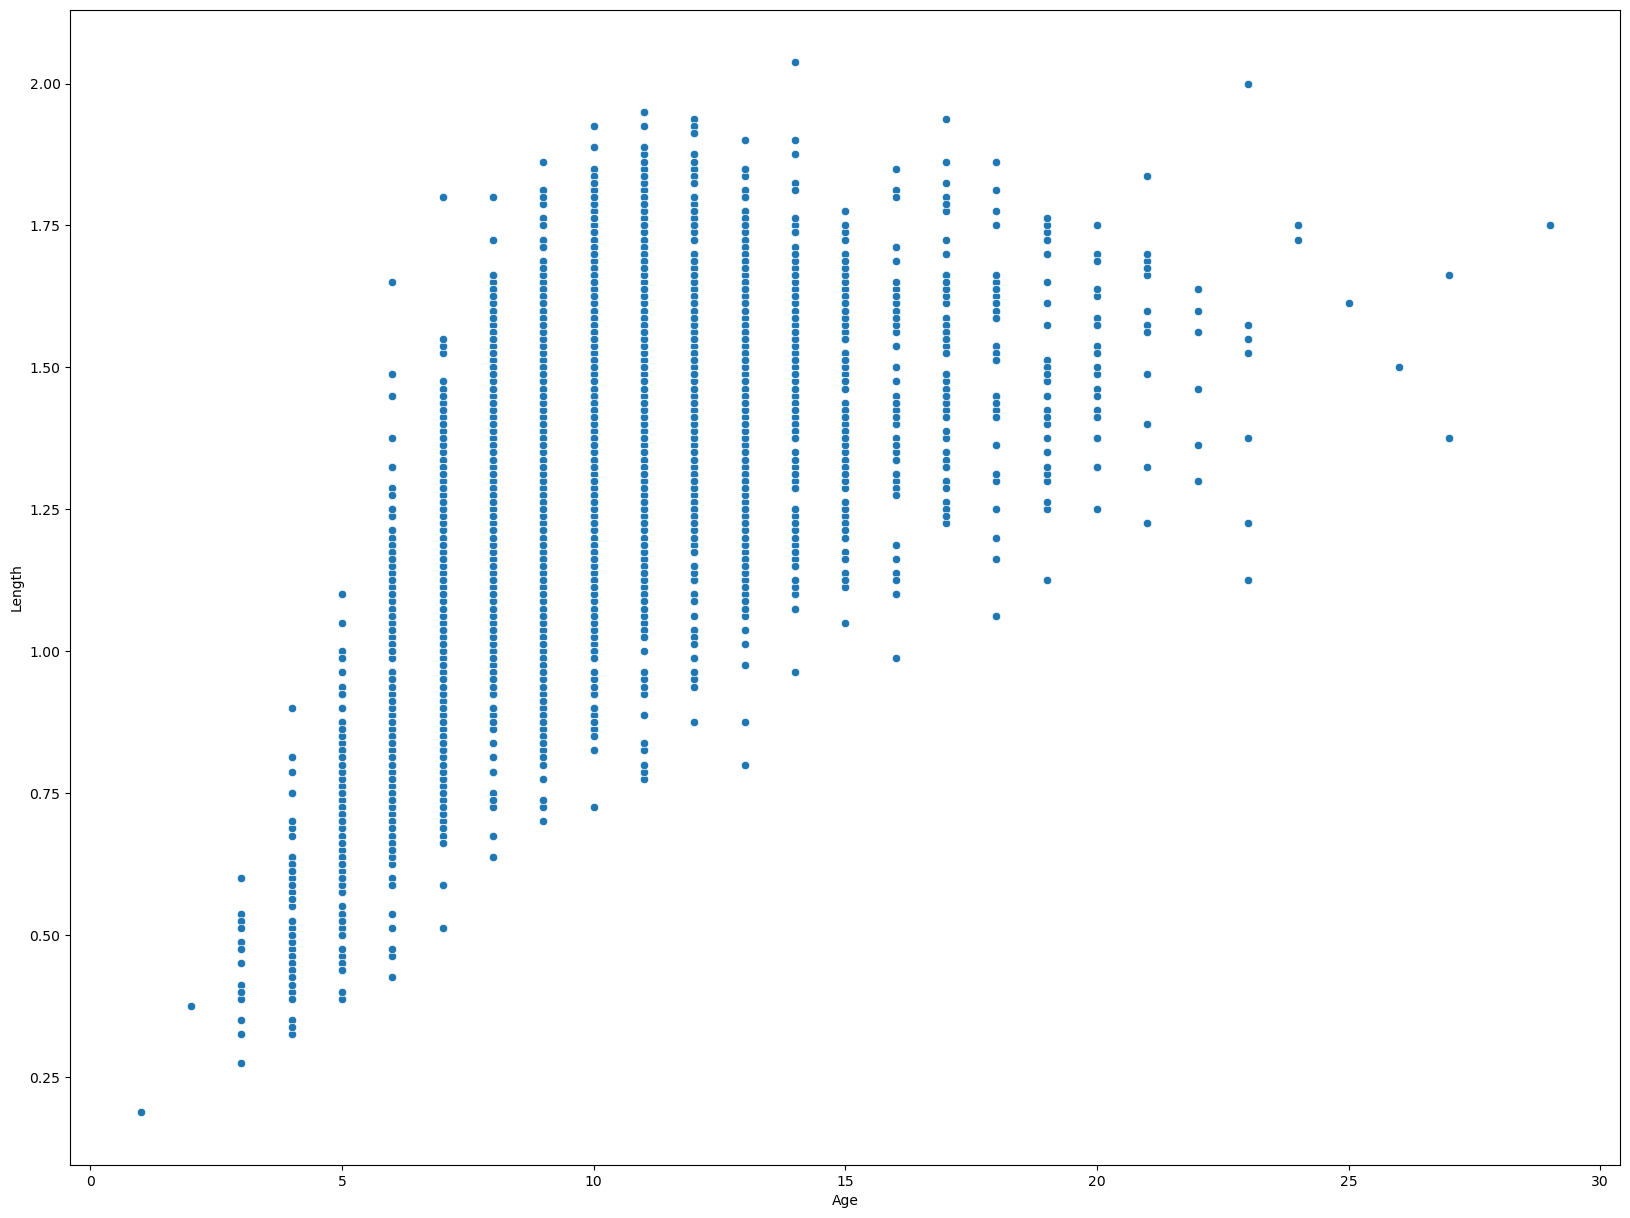

In [17]:
#undertaking scatterplot for the analysis 
plt.figure(figsize=(20,15))
sns.scatterplot(y=crab.Length, x=crab.Age, data=crab)
plt.show()

#the plot shows the distribution of 'Length' over various values of 'Age'
#a clear categorical analysis is not possible for such a plot, thus taking into account the 'swarmplot'
#as the plot contained a lot of points, thus swarm plot could be taken into account, thus 'strip plot' was used

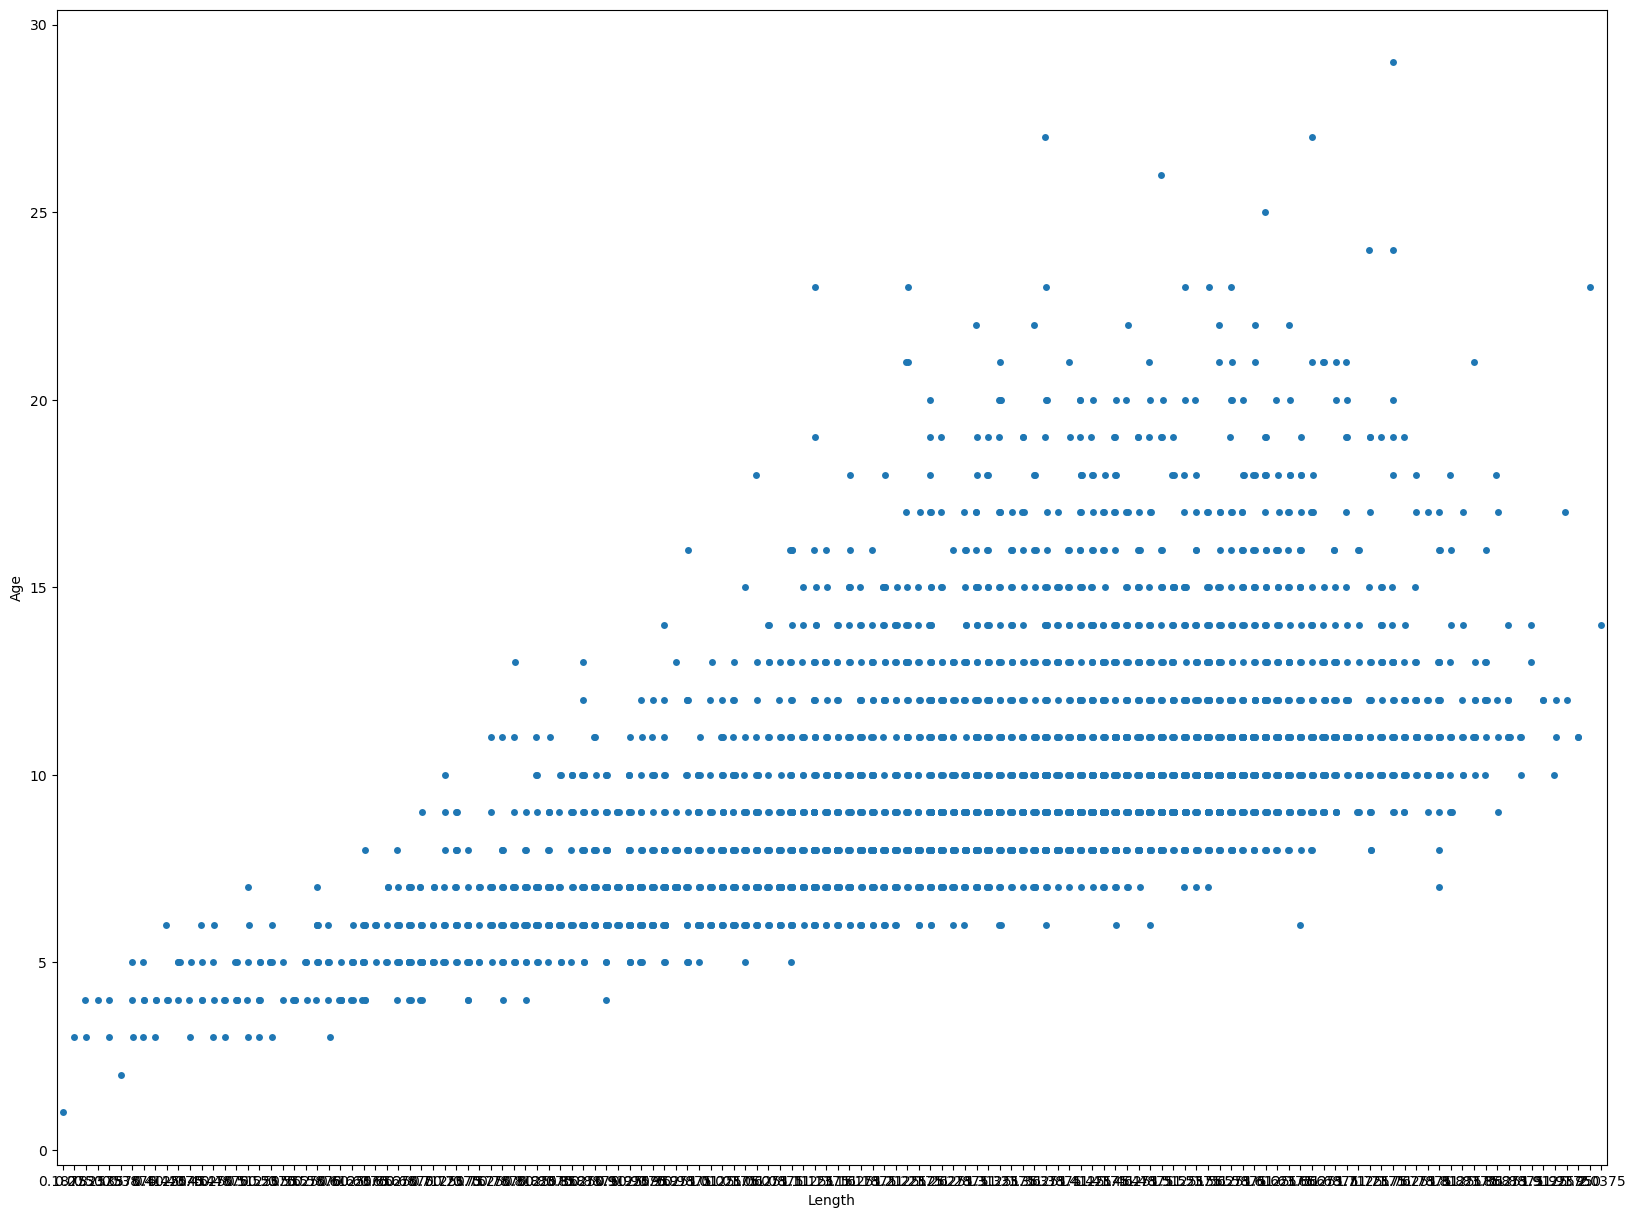

"\nFrom the analysis of scatter and strip plot for 'Length' and 'Age':\n1) The 'Age' of crabs between 7 and 30 have the highest 'Length' values\n2) After the 'Age' of 10, all the crabs have 'Length' more than 0.50, with the highest at 'Age' between 10 to 15\n3) Between the age 0 to 5, no crabs have 'Length' more than 1.25\n"

In [18]:
#undertaking strip plot for the analysis 
plt.figure(figsize=(20,15))
sns.stripplot(x=crab.Length, y=crab.Age, data=crab)
plt.show()

#the strip plot in this case only showed a higher density of points

'''
From the analysis of scatter and strip plot for 'Length' and 'Age':
1) The 'Age' of crabs between 7 and 30 have the highest 'Length' values
2) After the 'Age' of 10, all the crabs have 'Length' more than 0.50, with the highest at 'Age' between 10 to 15
3) Between the age 0 to 5, no crabs have 'Length' more than 1.25
'''
#based on the plots, we keep the data from the 'Length' attribute

### Analysis between Diameter and Age

In [19]:
#detecting the type of entries in the output column 'Diameter'

crab.Diameter.unique()

#the unqiue entries in the 'Diameter' attribute states that it contains continuous data points

array([1.175 , 0.65  , 0.775 , 0.8875, 0.6625, 1.1625, 1.    , 1.0125,
       1.25  , 0.6875, 0.5375, 1.05  , 0.6375, 1.075 , 0.95  , 1.2875,
       1.3125, 1.1   , 0.575 , 0.8   , 0.4375, 0.975 , 1.2125, 0.8125,
       0.875 , 1.1875, 1.225 , 1.0375, 0.8625, 0.825 , 1.125 , 0.5125,
       1.4   , 1.35  , 1.025 , 1.45  , 1.3625, 1.4125, 0.5   , 0.9375,
       1.3   , 1.1375, 0.7   , 0.8375, 1.0875, 1.425 , 1.2   , 1.2375,
       1.275 , 1.0625, 1.325 , 1.15  , 0.9625, 0.725 , 1.1125, 0.4875,
       1.3375, 0.75  , 0.9   , 0.7875, 0.5875, 0.625 , 1.2625, 0.85  ,
       0.3375, 1.4375, 0.525 , 1.4625, 0.5625, 1.475 , 0.925 , 0.7625,
       1.5   , 0.675 , 0.475 , 1.375 , 0.9125, 0.9875, 0.2625, 0.6   ,
       0.55  , 0.7125, 0.425 , 1.575 , 0.45  , 0.375 , 1.4875, 0.6125,
       0.2875, 0.3625, 1.5125, 0.225 , 0.4125, 1.3875, 0.35  , 0.4   ,
       0.7375, 0.3   , 0.325 , 0.25  , 0.2375, 1.525 , 0.1375, 0.4625,
       0.3125, 1.625 , 1.5375, 0.275 , 0.3875, 1.55  , 1.5625])

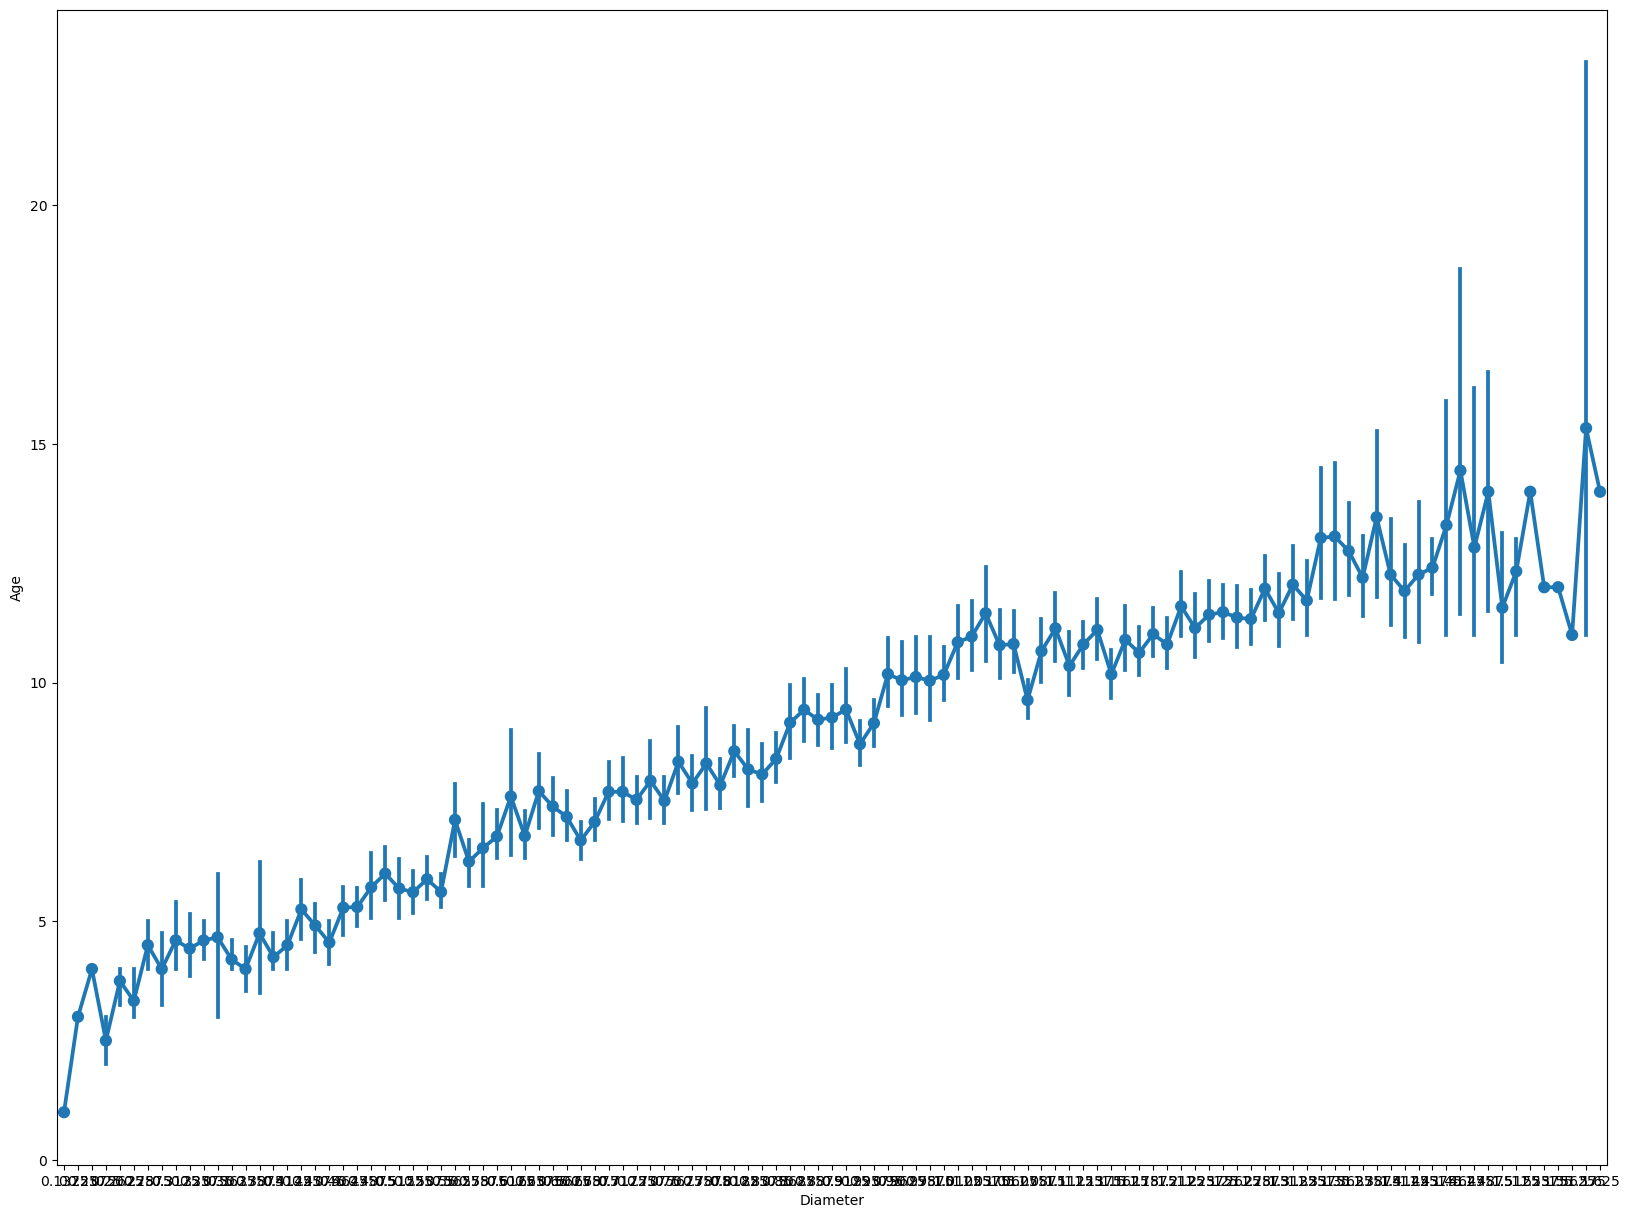

In [20]:
#undertaking point plot for the analysis
plt.figure(figsize=(20,15))
sns.pointplot(x=crab.Diameter,y=crab.Age,data=crab)
plt.show()

#it can be seen that the 'Diameter' increases with their 'Age'
#the highest 'Diameter' even more than 25, and the lowest as below as 2-3

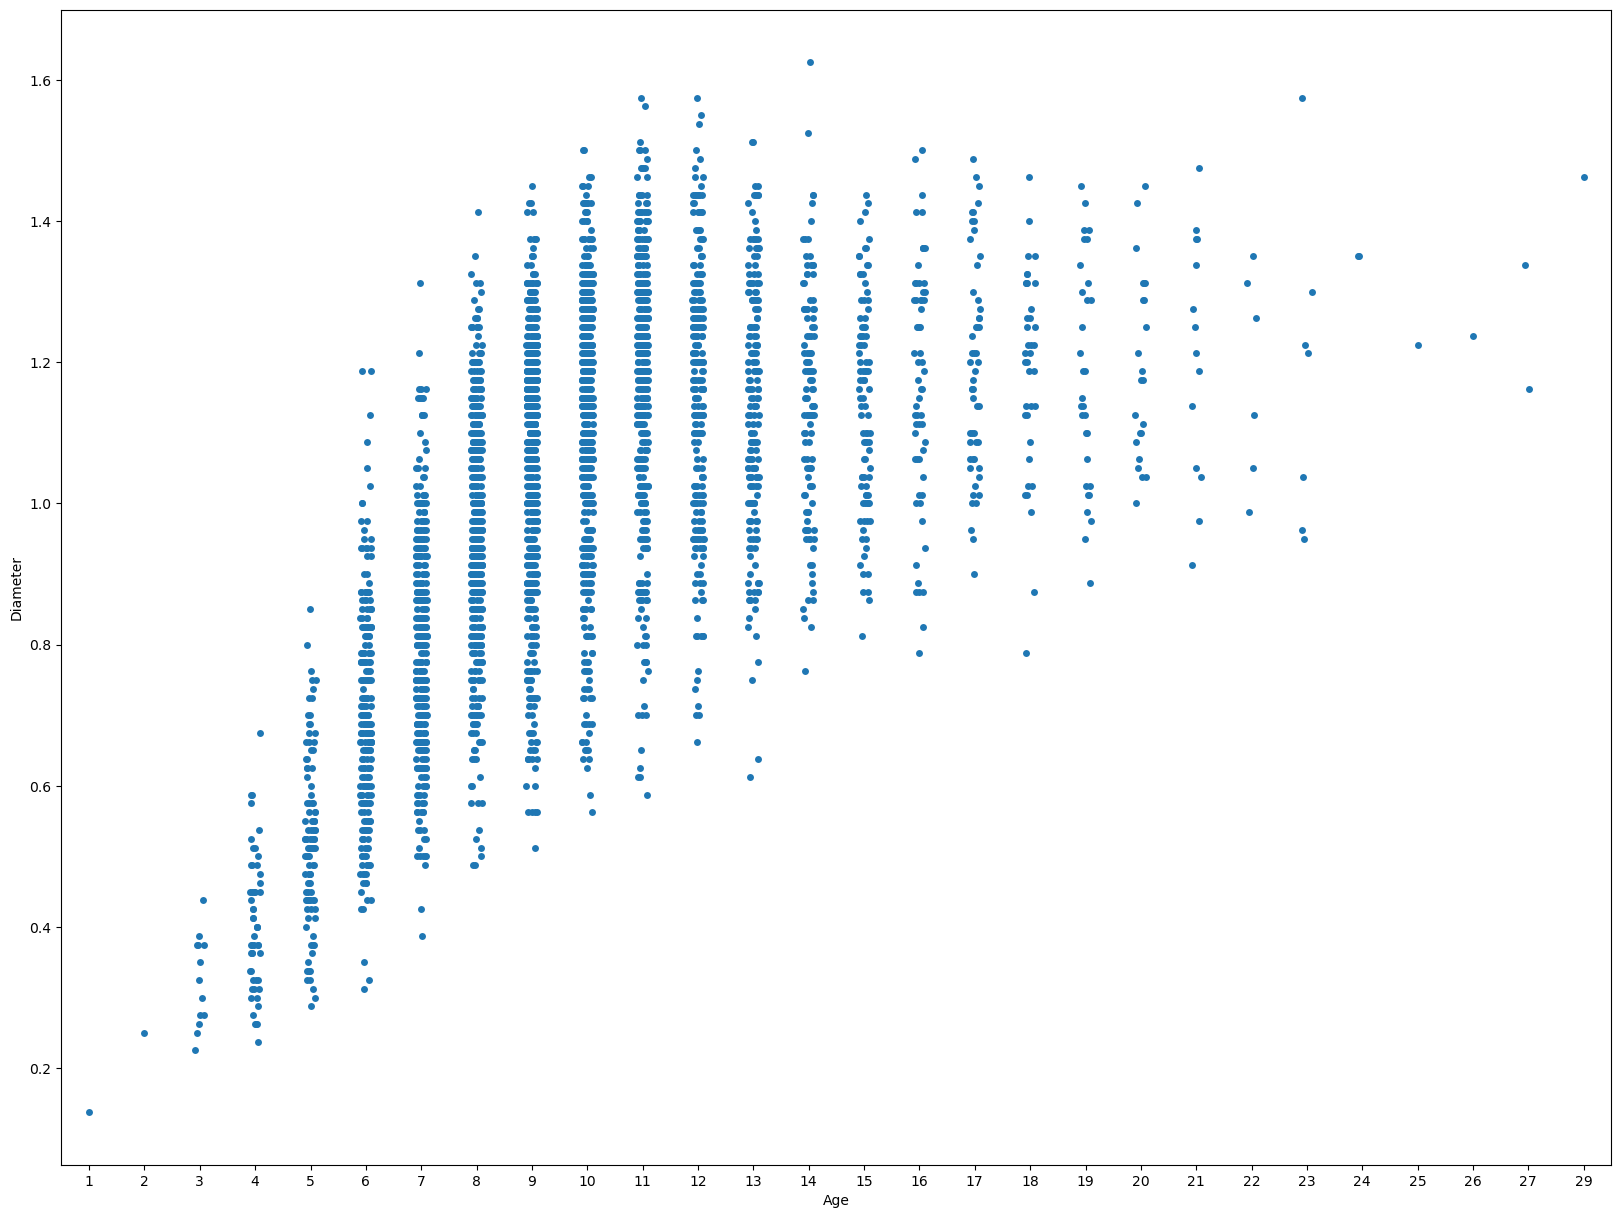

"\nFrom the analysis of scatter and strip plot for 'Diameter' and 'Age':\n1) The 'Age' of crabs between 7 and 30 have the highest 'Diameter' values\n2) After the 'Age' of 10, all the crabs have 'Diameter' more than 0.40, with the highest at 'Age' between 10 to 15\n3) Between the 'Age' 0 to 5, no crabs have 'Diameter' more than 1.0\n4) Very less carb have 'Diameter' less than 1.0, after the 'Age' of 25\n"

In [21]:
#undertaking strip plot for the analysis
plt.figure(figsize=(20,15))
sns.stripplot(y=crab.Diameter,x=crab.Age,data=crab)
plt.show()


'''
From the analysis of scatter and strip plot for 'Diameter' and 'Age':
1) The 'Age' of crabs between 7 and 30 have the highest 'Diameter' values
2) After the 'Age' of 10, all the crabs have 'Diameter' more than 0.40, with the highest at 'Age' between 10 to 15
3) Between the 'Age' 0 to 5, no crabs have 'Diameter' more than 1.0
4) Very less carb have 'Diameter' less than 1.0, after the 'Age' of 25
'''
#based on the plots, we keep the data from the 'Diameter' attribute

### Analysis between Heigth and Age

In [22]:
#detecting the type of entries in the output column 'Height'

crab.Height.unique()

#the unqiue entries in the 'Height' attribute states that it contains continuous data points

array([0.4125, 0.2125, 0.25  , 0.35  , 0.325 , 0.375 , 0.3375, 0.1875,
       0.4375, 0.225 , 0.3625, 0.3   , 0.5   , 0.45  , 0.475 , 0.2375,
       0.1625, 0.3875, 0.4   , 0.2625, 0.4625, 0.425 , 0.2   , 0.4875,
       0.275 , 0.2875, 0.1375, 0.3125, 0.55  , 0.5125, 0.525 , 0.175 ,
       0.1   , 0.575 , 0.    , 0.0875, 0.15  , 0.5375, 0.125 , 0.1125,
       0.0625, 1.2875, 0.075 , 0.625 , 0.6   , 0.05  , 0.0375, 0.5875,
       0.025 , 0.5625, 2.825 ])

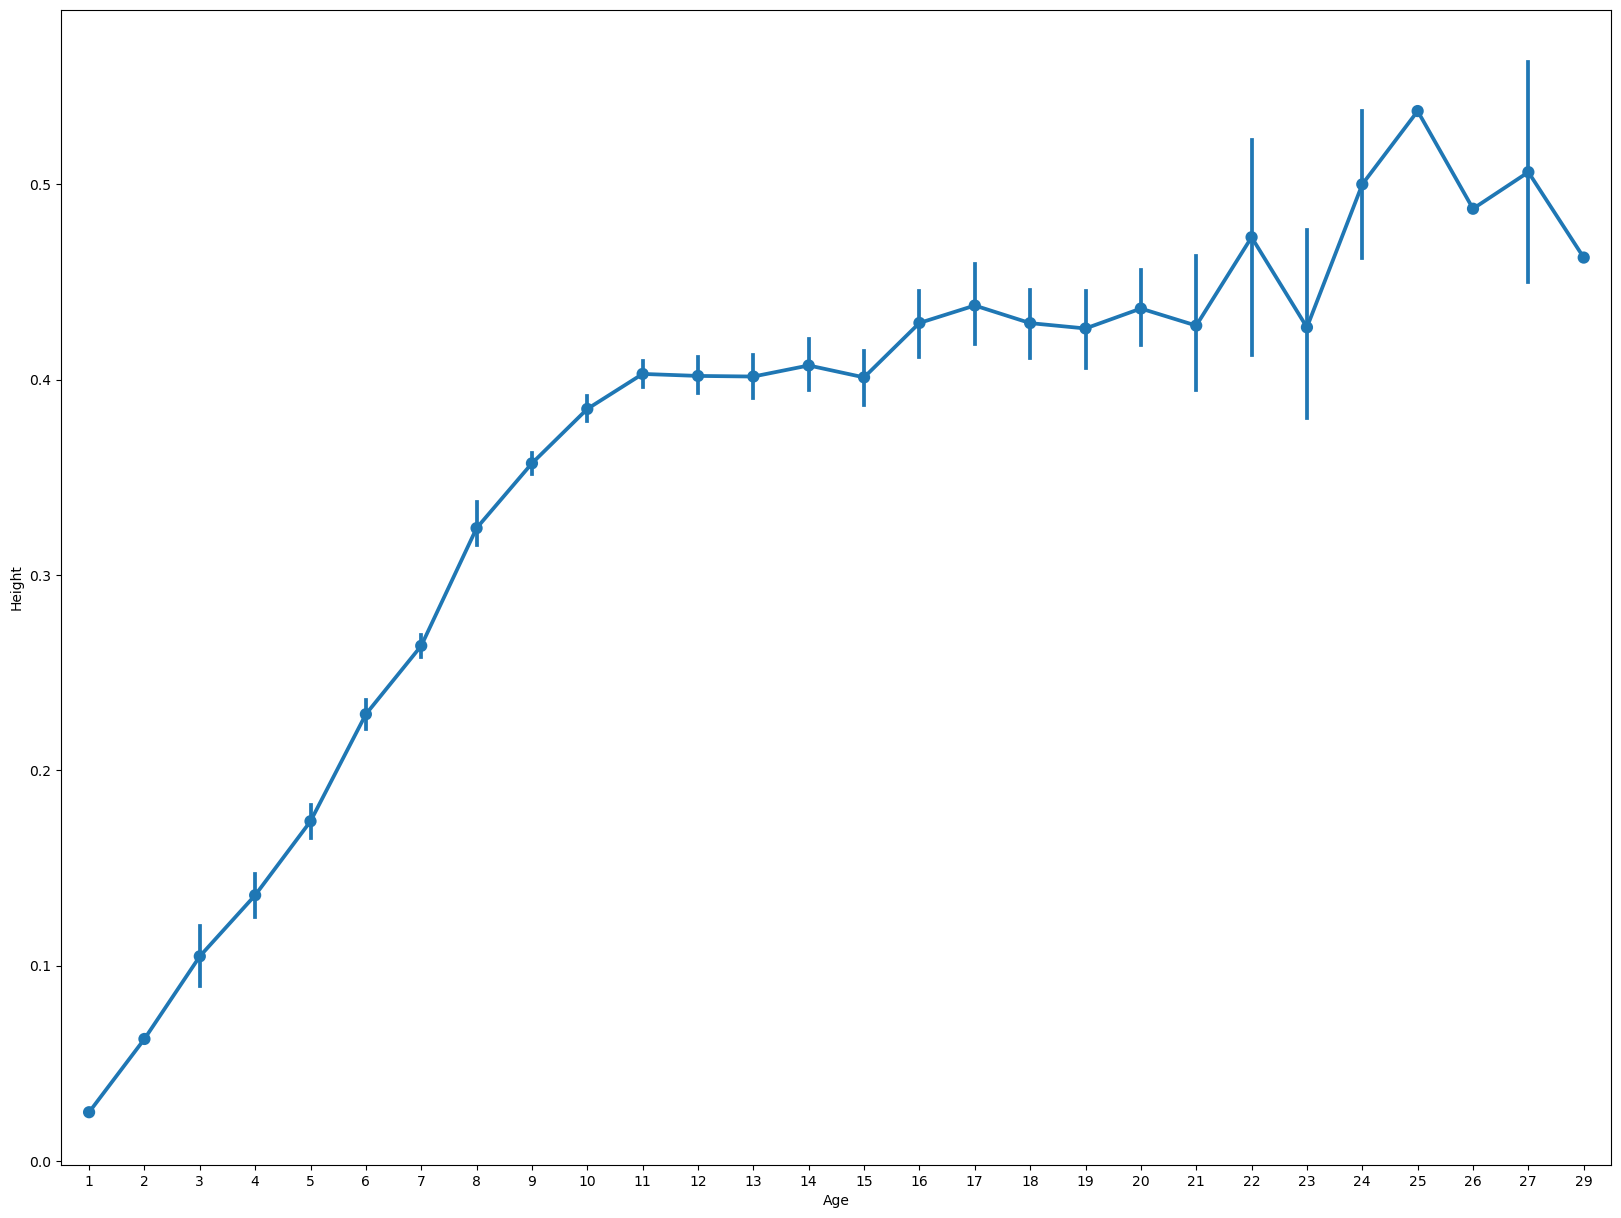

In [23]:
#undertaking the point plot for analysis
plt.figure(figsize=(20,15))
sns.pointplot(y=crab.Height,x=crab.Age,data=crab)
plt.show()

#there is a clear variation of the 'Age' attribute with the 'Height' attribute

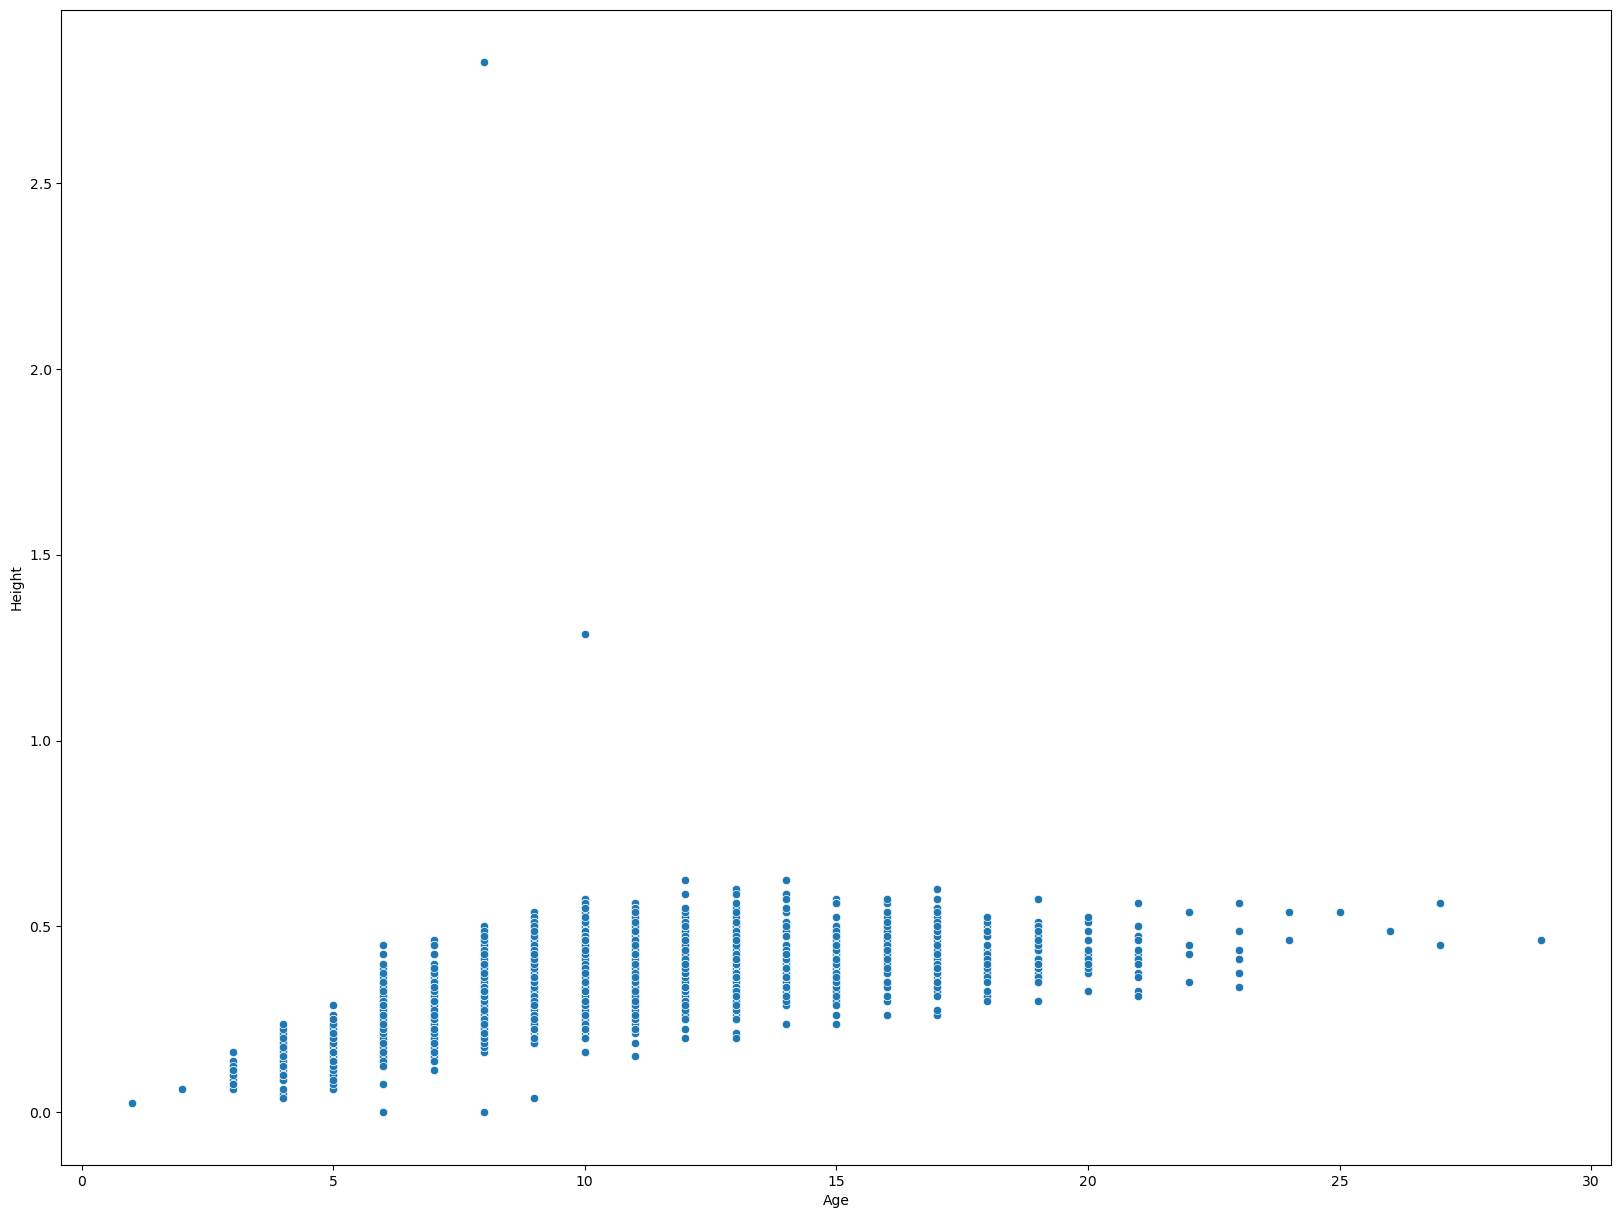

In [24]:
#undertaking the scatter plot for analysis
plt.figure(figsize=(20,15))
sns.scatterplot(x=crab.Age,y=crab.Height,data=crab)
plt.show()

#it can be observed that the 'Height' of most of the crabs are between 0.0 to 0.5

#based on the above plots, we decide to keep the data from the 'Height' attribute

### Analysis of Weight and Age

In [25]:
#detecting the type of entries in the output column 'Weight'

crab.Weight.unique()

#the unqiue entries in the 'Weight' attribute states that it contains continuous data points

array([24.6357155 ,  5.40057975,  7.95203475, ..., 37.5630875 ,
       47.740558  ,  4.06815325])

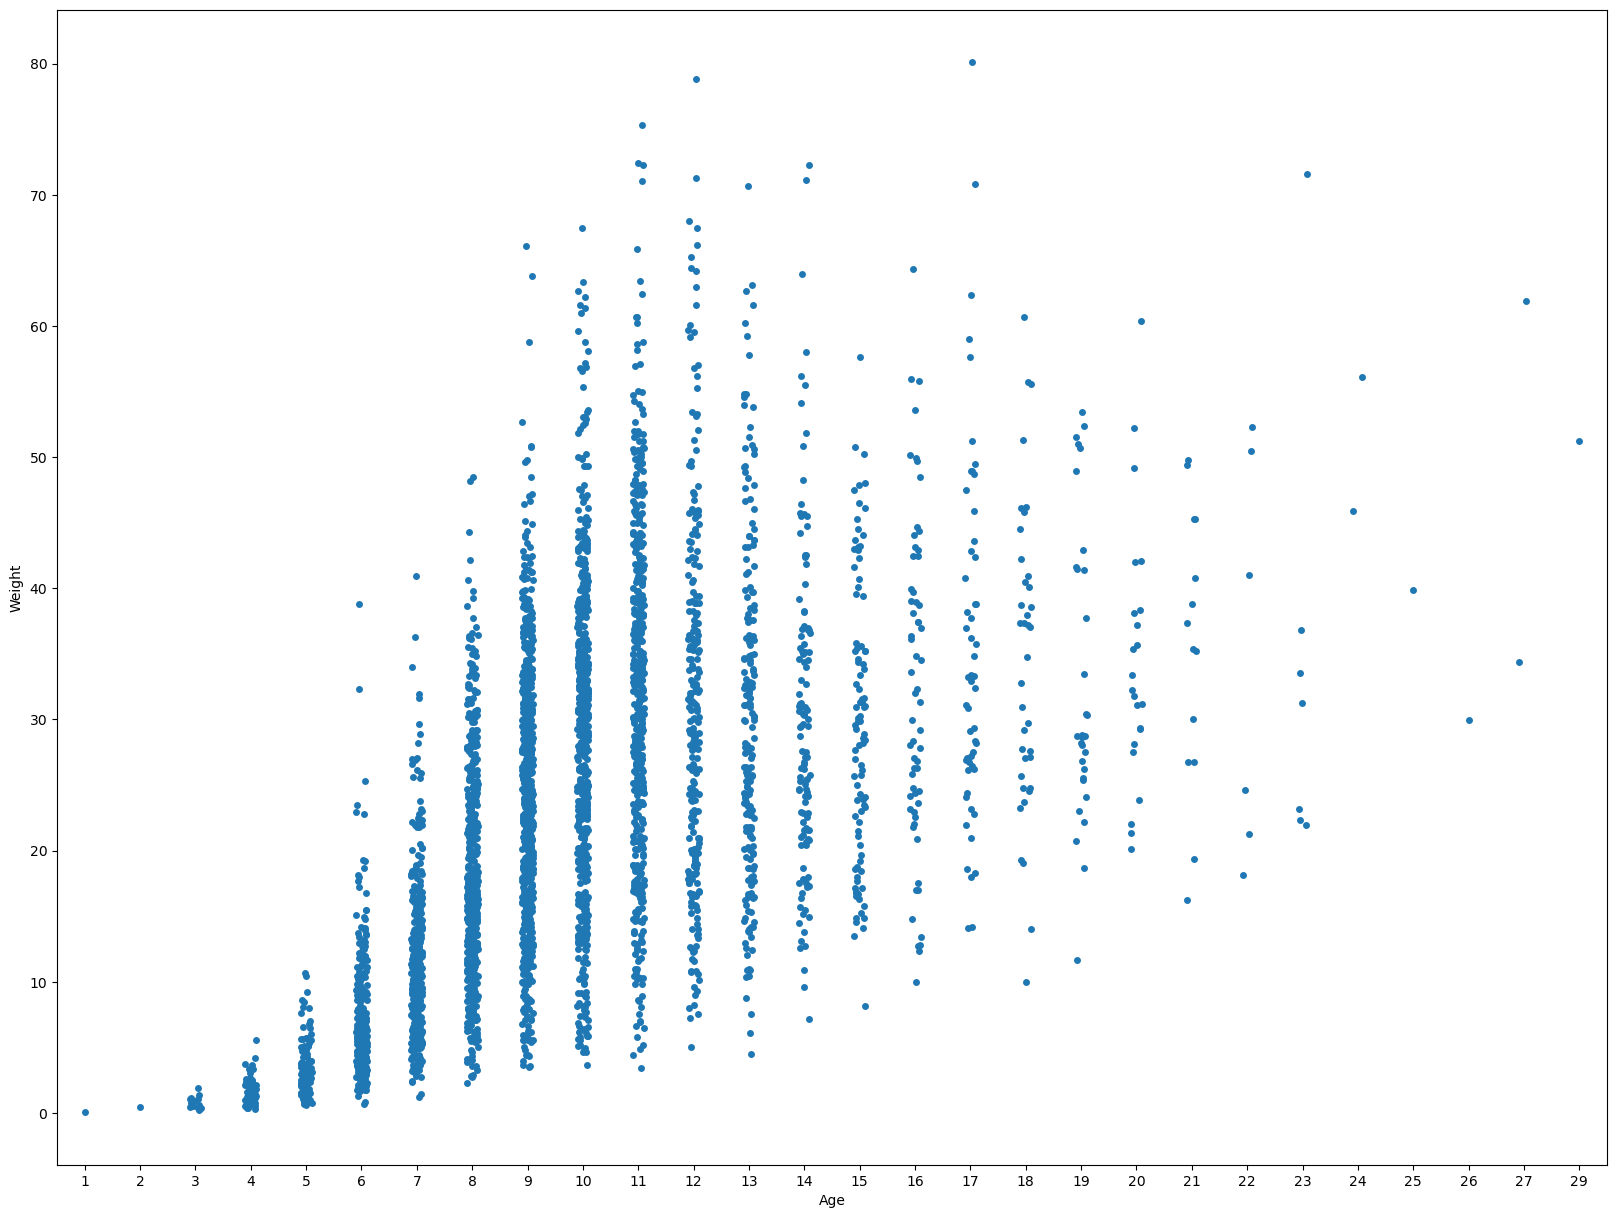

In [26]:
#using the strip plot for the analysis
plt.figure(figsize=(20,15))
sns.stripplot(x=crab.Age,y=crab.Weight,data=crab)
plt.show()

#upto the 'Age' of 5, very few crab have 'Weight' more than 20

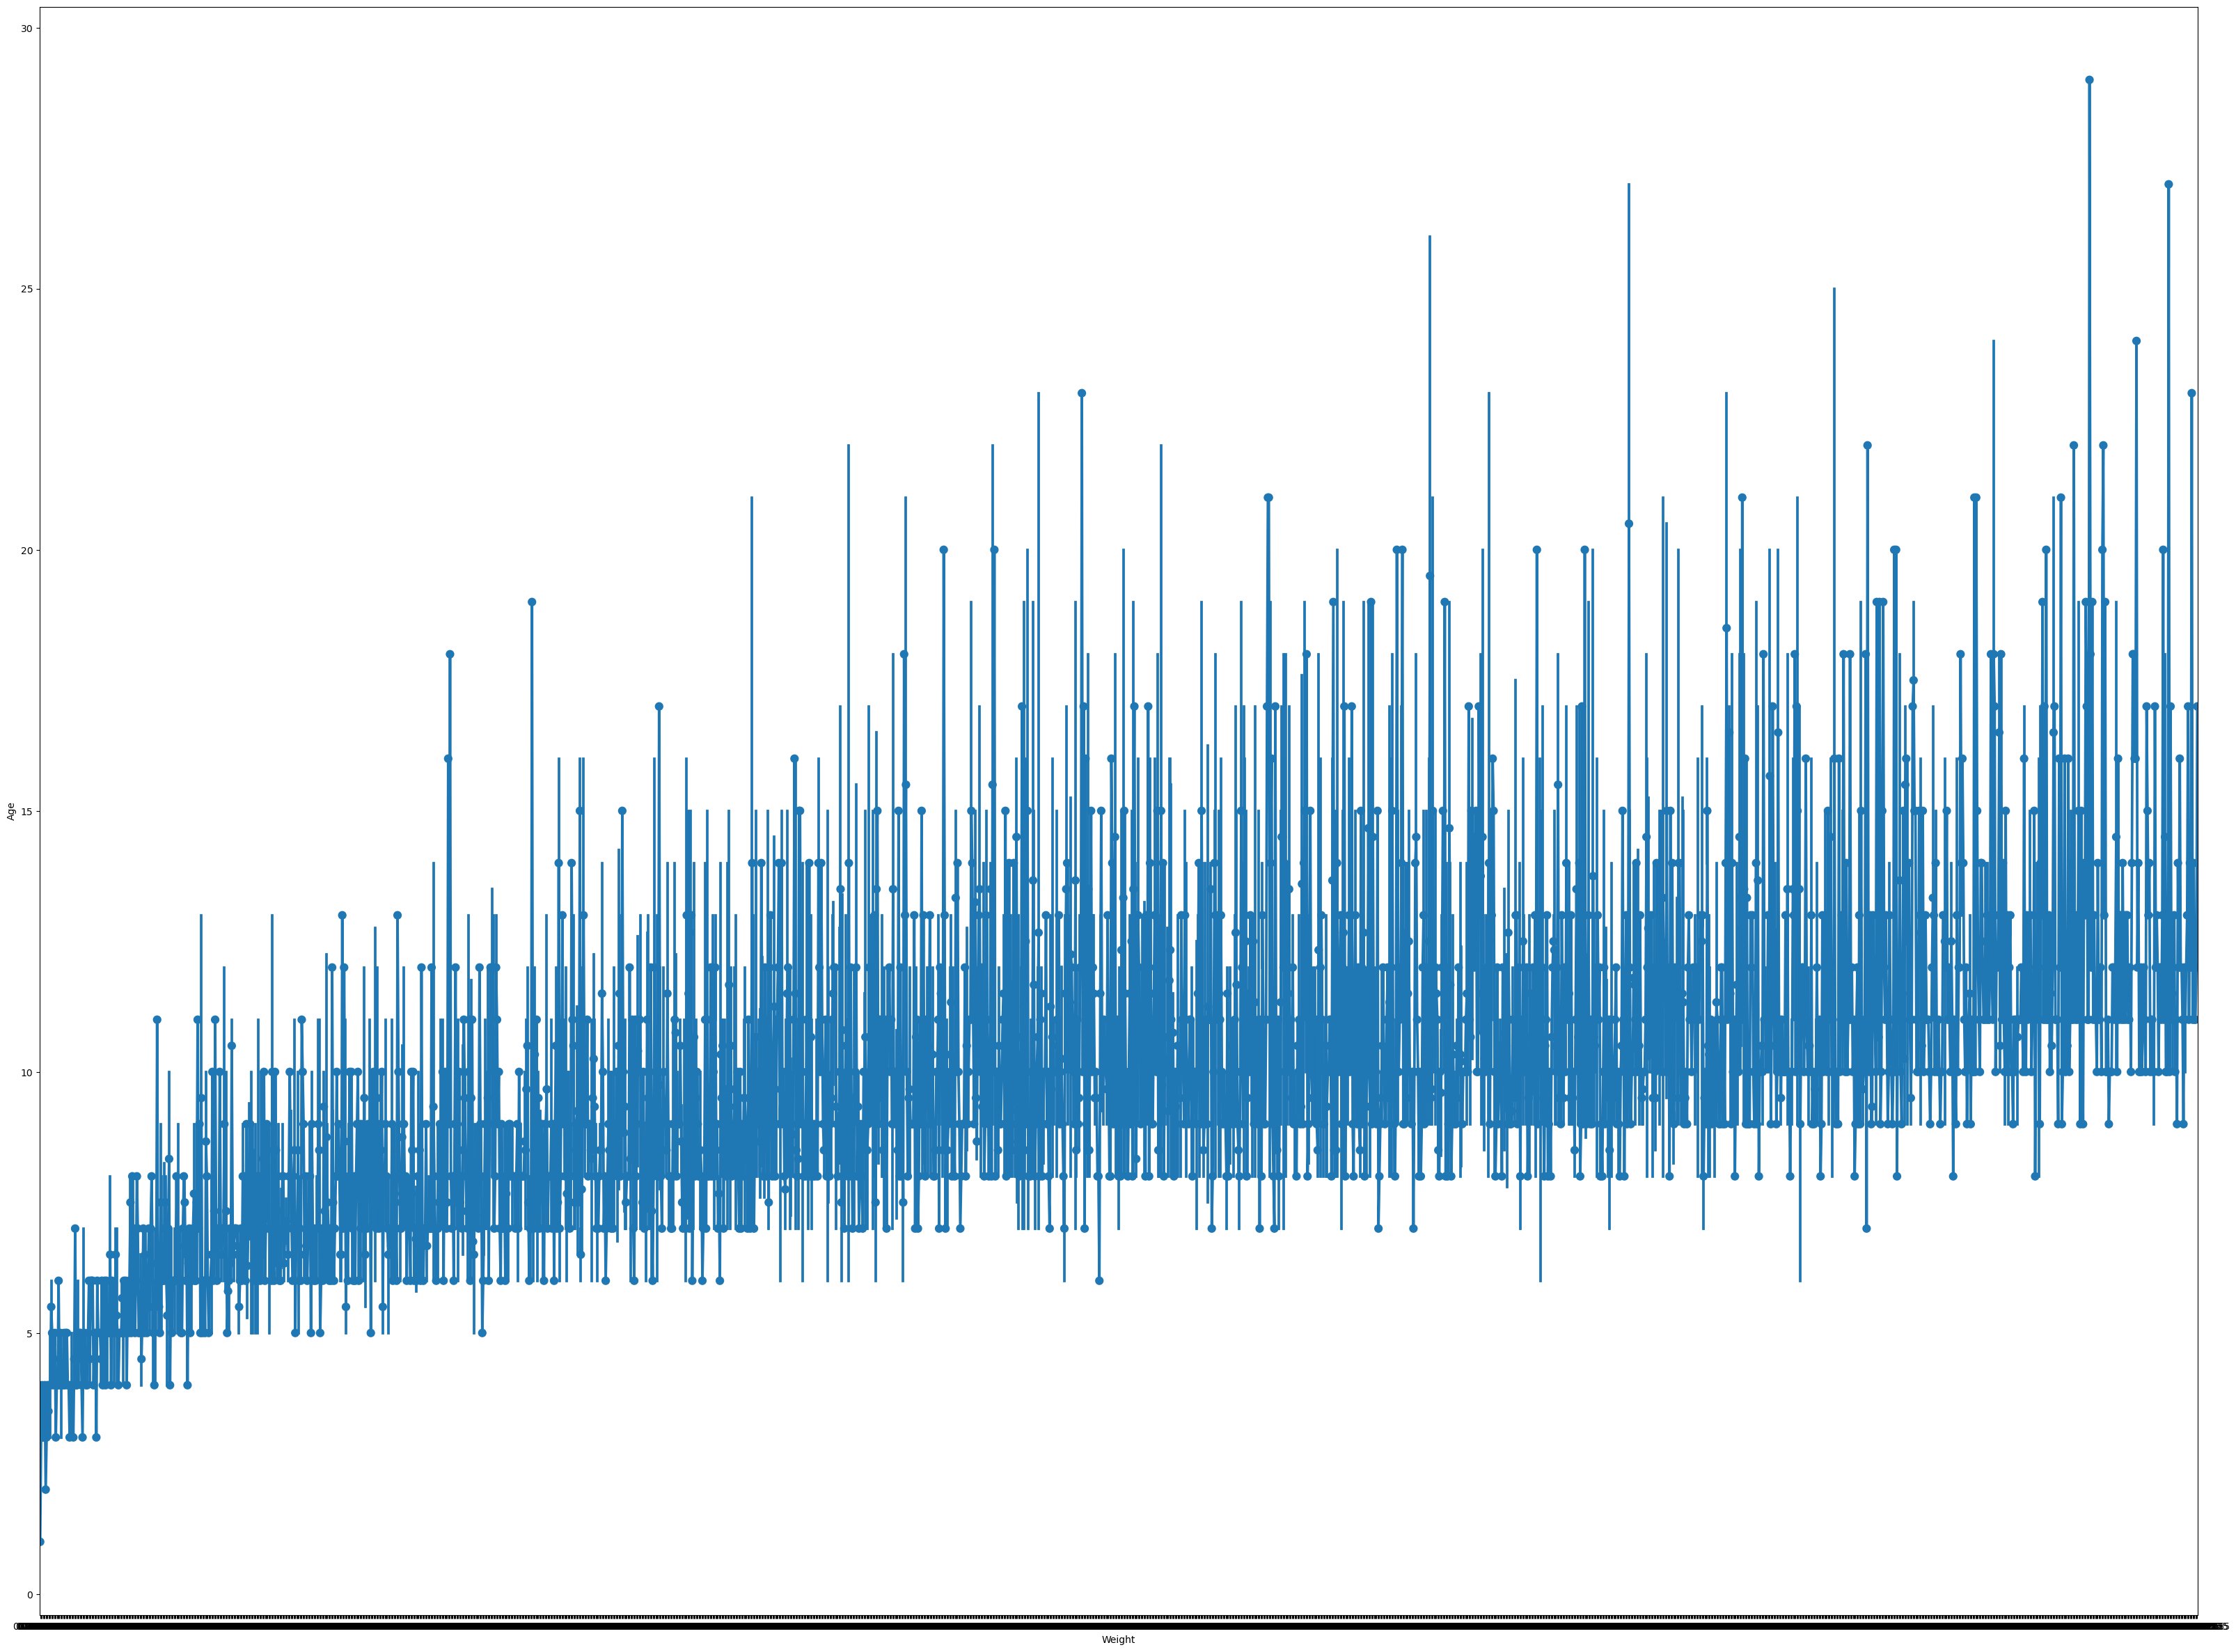

In [27]:
#using the point plot for the analysis
plt.figure(figsize=(40,30))
sns.pointplot(x=crab.Weight,y=crab.Age,data=crab)
plt.show()

#the data for 'Age' over various values of 'Weight' can be seen here
#further it can be noticed that the 'Weight' attribute, contains a lot of continuos values
#a clear variation is visible from the slope of the curve in the plot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


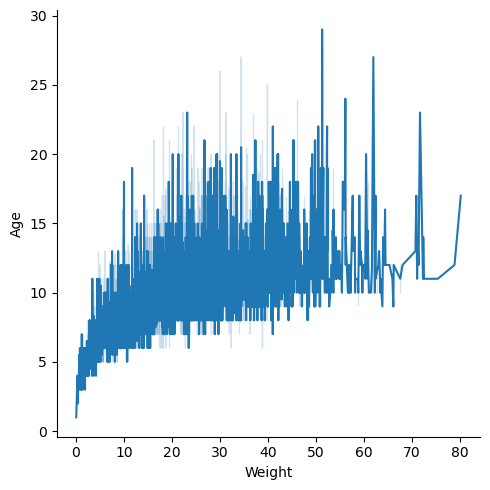

In [28]:
#using the rel plot for analysis
sns.relplot(x=crab.Weight,y=crab.Age,data=crab,kind='line')
plt.show()

#it did not yeild any unique results, except for the increasing trend of weight and  densities of the data points

#it can be assumed from the above plots that the 'Weight' attribute maybe kept for model training, 
#but may also be dropped to increase the model's accuracy

### Analysis of Shucked Weight and Age

In [29]:
#detecting the type of entries in the output column 'Shucked Weight'

crab['Shucked Weight'].unique()

#the unqiue entries in the 'Shucked Weight' attribute states that it contains continuous data points

array([12.3320325 ,  2.2963095 ,  3.231843  , ...,  9.93649975,
       14.8834875 , 14.07552675])

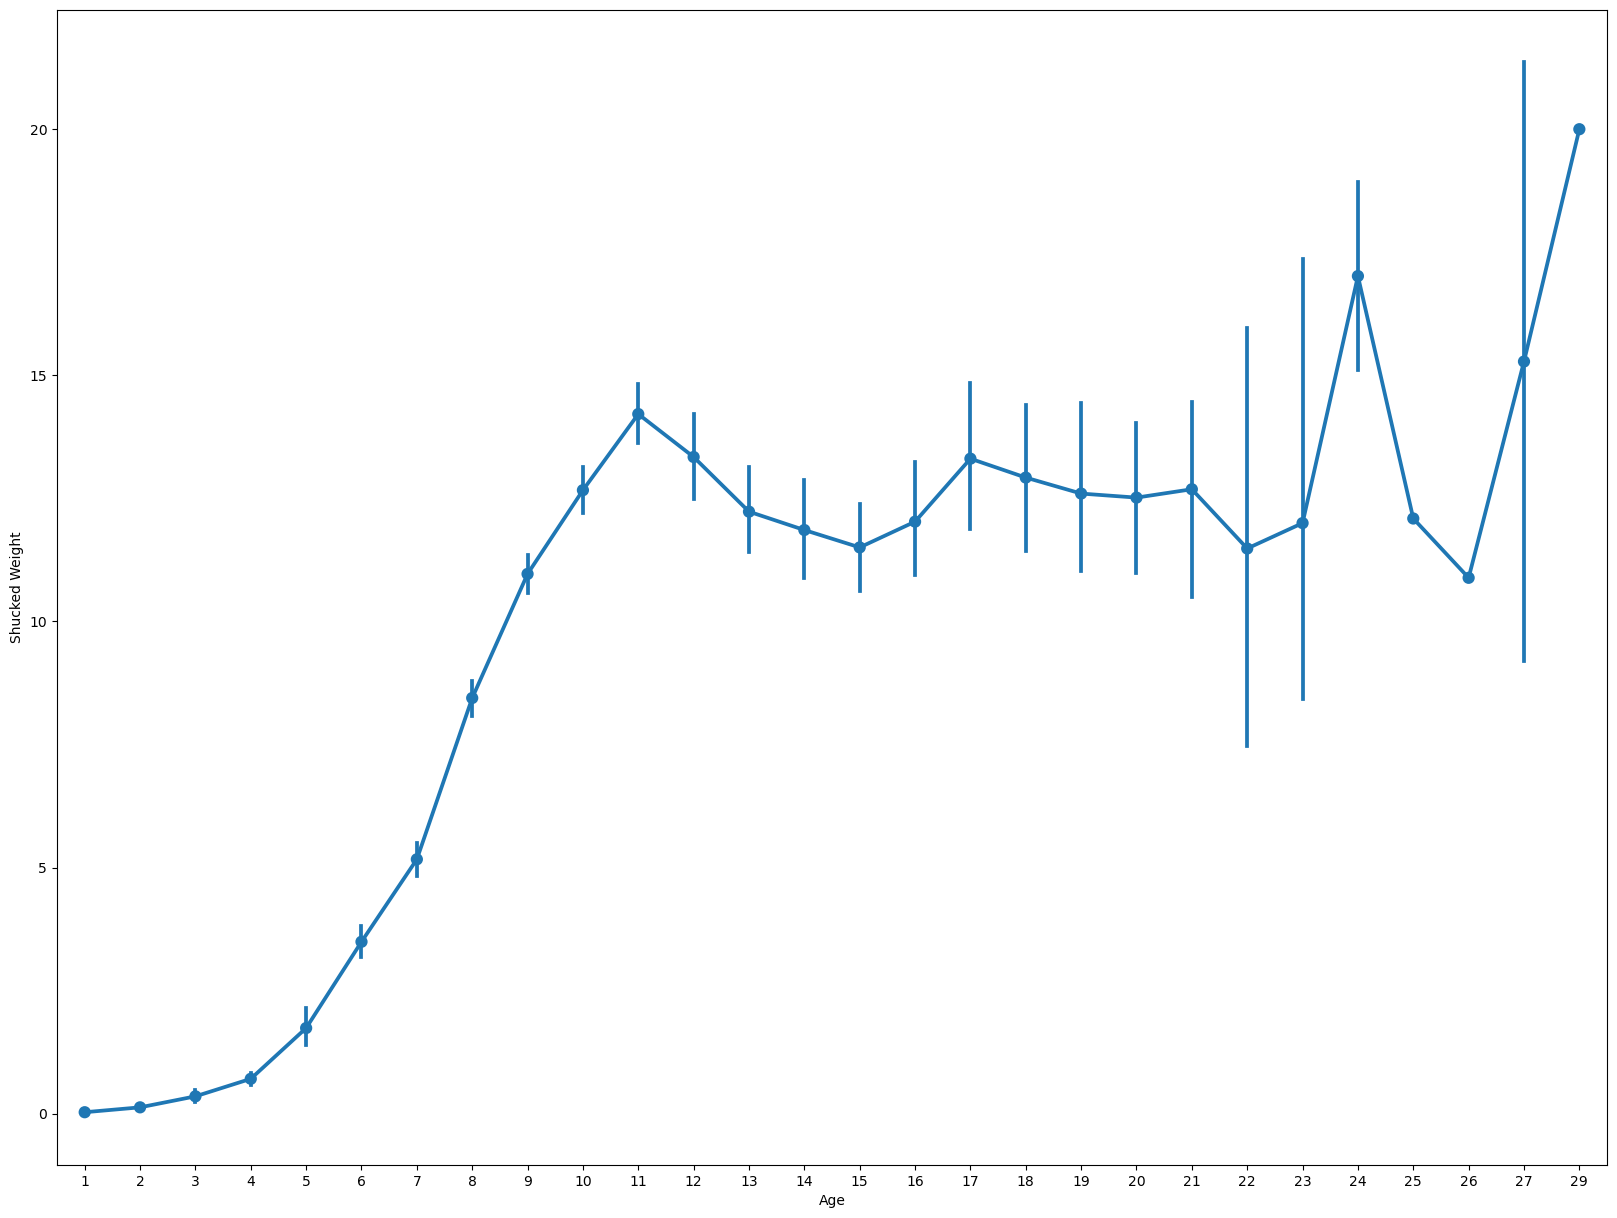

In [30]:
#using the point plot for analysis
plt.figure(figsize=(20,15))
sns.pointplot(y=crab['Shucked Weight'],x=crab.Age,data=crab)
plt.show()

#the plot shows a clear variation of 'Shucked Weight' with 'Age', as it is having a changing slope with changing 'Age'

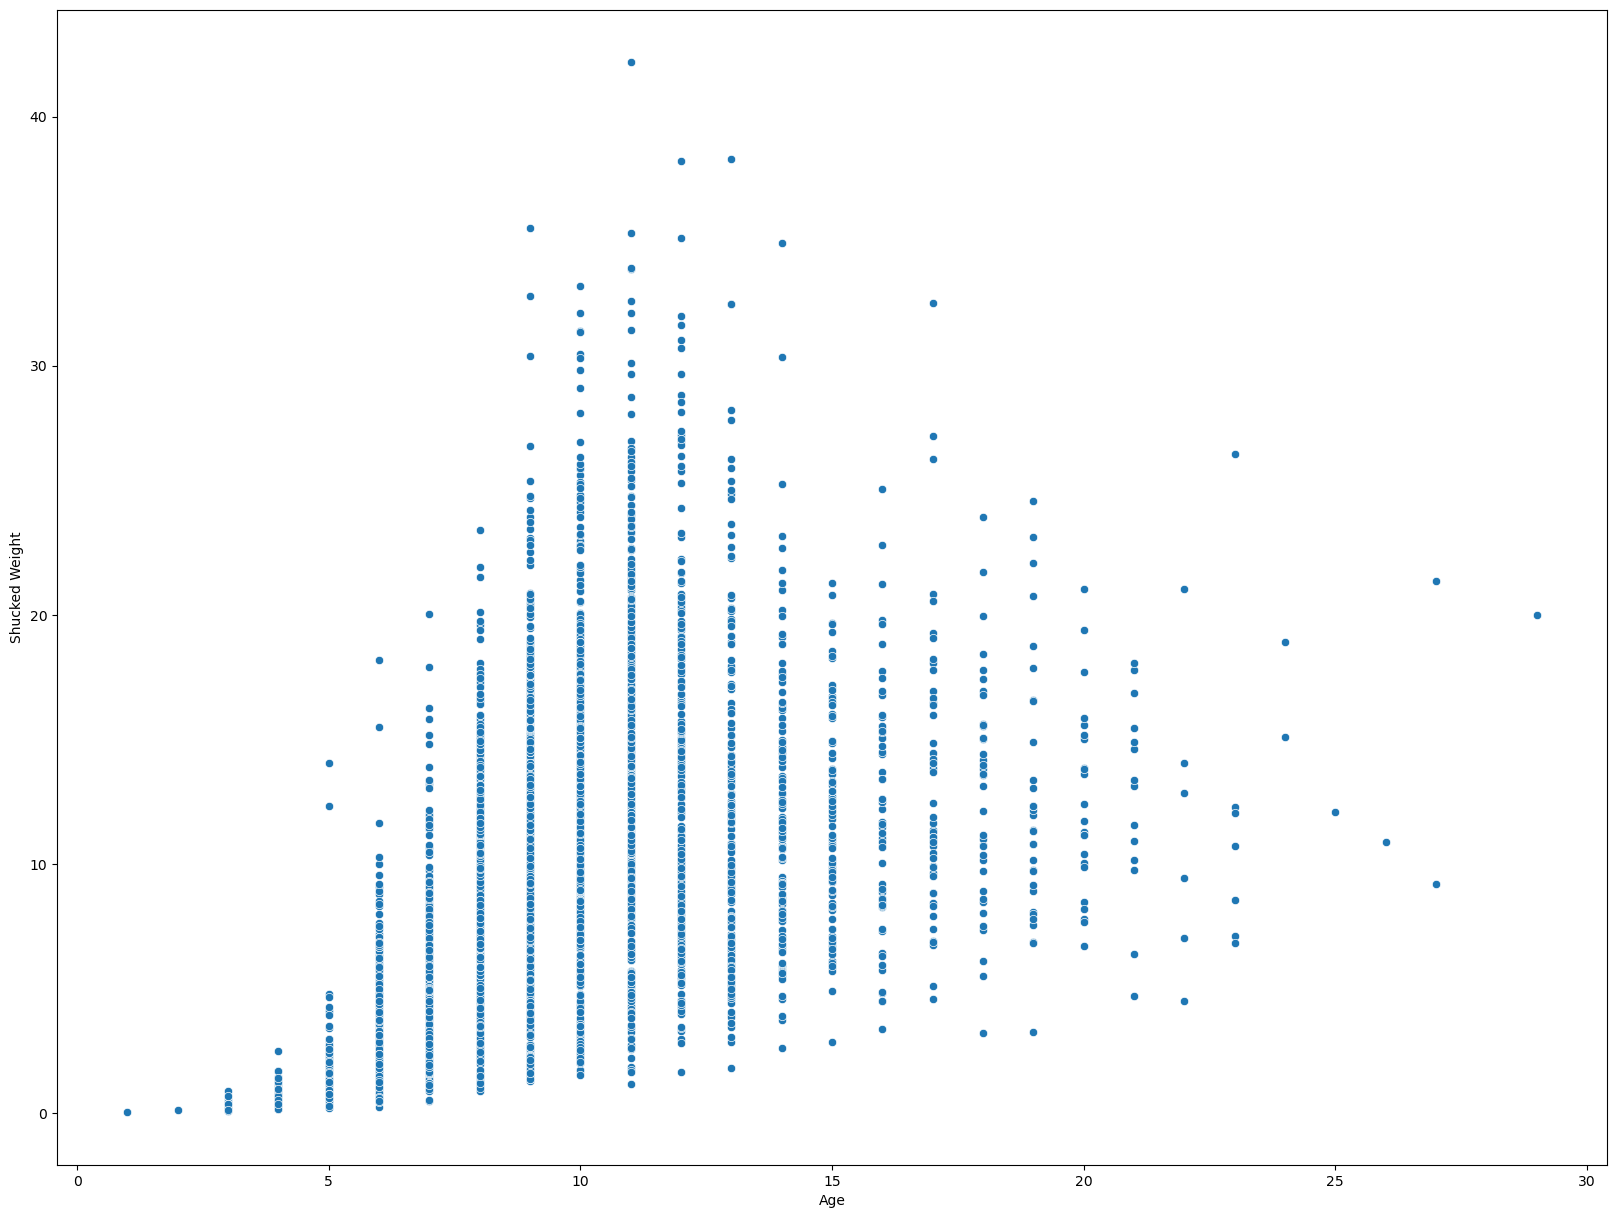

In [31]:
#using the scatter plot for analysis
plt.figure(figsize=(20,15))
sns.scatterplot(x=crab.Age,y=crab['Shucked Weight'],data=crab)
plt.show()

#at most of the age group, some crabs have the 'Shucked weight' value of near to 0
#the highest value for the 'Shucked weight' can be seen at the ages of 6 and 29, which is anomaly 

#as per the above plots, especially the point plot,we can see that 'Shucked weight' varies non-linearly over the various values of 'Age'
#the data from the 'shucked weight' is to be kept for the model training

### Analysis between Viscera Weight and Age

In [32]:
#detecting the type of entries in the output column 'Viscera Weight'

crab['Viscera Weight'].unique()

#the unqiue entries in the 'Viscera Weight' attribute states that it contains continuous data points

array([5.58485150e+00, 1.37495075e+00, 1.60174675e+00, 2.28213475e+00,
       1.48834875e+00, 6.76135575e+00, 5.85417175e+00, 5.30135650e+00,
       9.76640275e+00, 1.26155275e+00, 7.51261750e-01, 5.03203625e+00,
       8.36310250e-01, 4.30912400e+00, 3.94058050e+00, 8.75999550e+00,
       8.49067525e+00, 1.84271750e+00, 6.87475375e+00, 8.64659750e-01,
       2.55145500e+00, 8.77417025e+00, 1.55922250e+00, 2.97669750e-01,
       3.99727950e+00, 4.52174525e+00, 8.41980150e+00, 9.08601475e+00,
       1.72931950e+00, 1.78601850e+00, 3.48698850e+00, 4.02562900e+00,
       6.37863750e+00, 8.40562675e+00, 4.81941500e+00, 2.87747425e+00,
       1.64427100e+00, 2.52310550e+00, 4.98951200e+00, 9.63883000e-01,
       9.12853900e+00, 7.79611250e+00, 1.77184375e+00, 9.01514100e+00,
       3.88388150e+00, 1.02483443e+01, 5.21630800e+00, 6.16601625e+00,
       3.14679450e+00, 1.08578585e+01, 4.79106550e+00, 4.32329875e+00,
       2.38135800e+00, 9.53960675e+00, 5.14543425e+00, 5.95339500e-01,
      

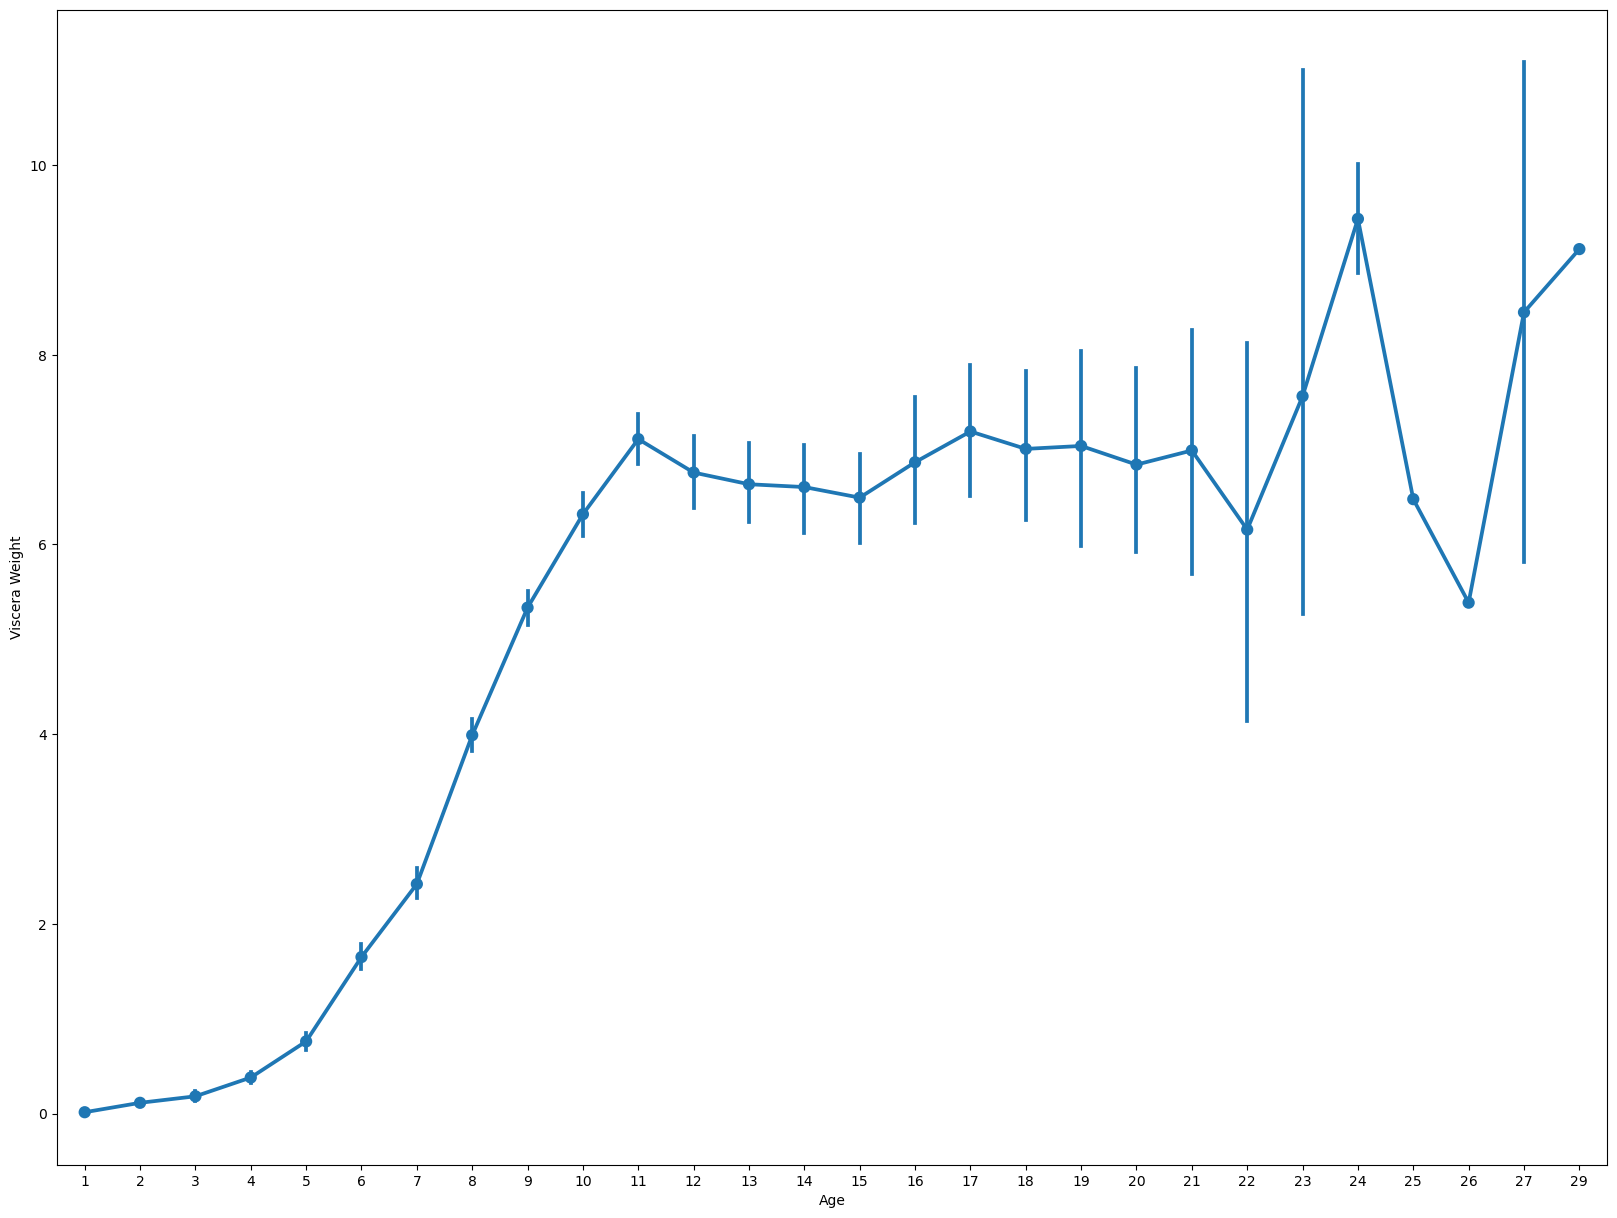

In [33]:
#using the point plot for analysis
plt.figure(figsize=(20,15))
sns.pointplot(x=crab.Age,y=crab['Viscera Weight'],data=crab)
plt.show()

#the plot shows a clear variation of 'Viscera Weight' with 'Age', as it is having a changing slope with changing 'Age'

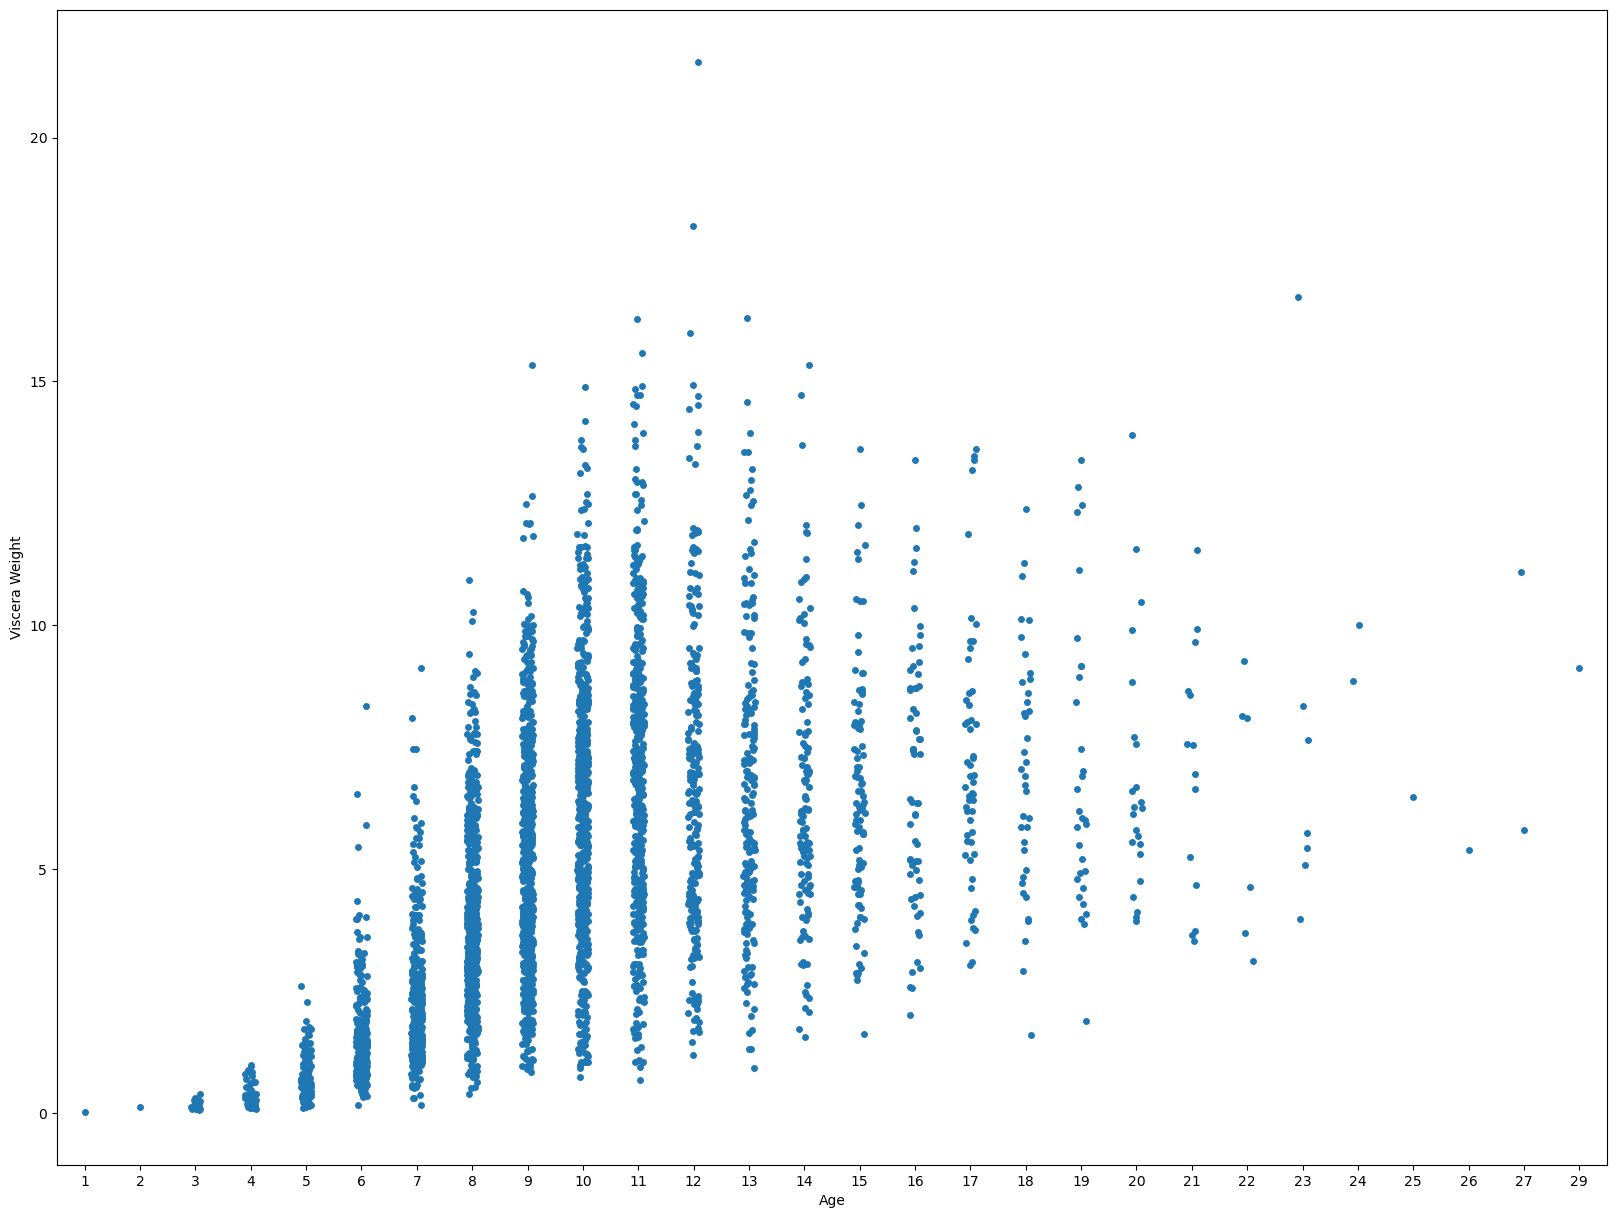

In [34]:
#using the strip plot for analysis
plt.figure(figsize=(20,15))
sns.stripplot(x=crab.Age,y=crab['Viscera Weight'],data=crab)
plt.show()

#upto the age of 10, some crabs have the 'Viscera weight' value of near to 0
#the highest value for the 'Viscera weight' can be seen at the age of 11
#after the age of 25, no carb have 'Viscera Weight' less than 5

#as per the above plots, especially the point plot,we can see that 'Viscera Weight' varies non-linearly over the various values of 'Age'
#the data from the 'Viscera weight' is to be kept for the model training

### Analysis between Shell Weight and Age

In [35]:
#detecting the type of entries in the output column 'Shell Weight'

crab['Shell Weight'].unique()

#the unqiue entries in the 'Shell Weight' attribute states that it contains continuous data points

array([ 6.747181  ,  1.5592225 ,  2.76407625,  5.2446575 ,  1.70097   ,
        7.2291225 ,  4.819415  ,  7.15824875, 10.24834425,  2.08368825,
        0.9922325 ,  7.7961125 ,  1.7860185 ,  6.3786375 ,  4.3941725 ,
       11.4815475 , 11.55242125,  2.26796   ,  8.3631025 ,  1.417475  ,
        3.3168915 ,  2.33883375,  0.56699   ,  5.06038575,  8.0796075 ,
        6.10931725,  9.7805775 ,  9.922325  ,  3.18931875,  4.6776675 ,
        5.9250455 ,  4.876114  , 12.0485375 , 10.0640725 ,  5.54232725,
        2.6932025 ,  1.13398   ,  2.83495   ,  7.200773  ,  1.40330025,
       11.7650425 ,  8.7599955 ,  3.2601925 , 13.324265  ,  6.23689   ,
       13.36678925,  8.221355  ,  7.89533575,  3.69960975, 13.33843975,
        8.50485   ,  6.6621325 ,  3.9405805 , 16.0174675 ,  7.66853975,
        0.737087  ,  2.7499015 ,  1.8427175 ,  8.9300925 , 10.20582   ,
       10.9145575 ,  5.76912325,  8.788345  ,  2.097863  ,  0.850485  ,
        4.26659975,  9.34116025,  3.118445  ,  6.50621025,  9.49

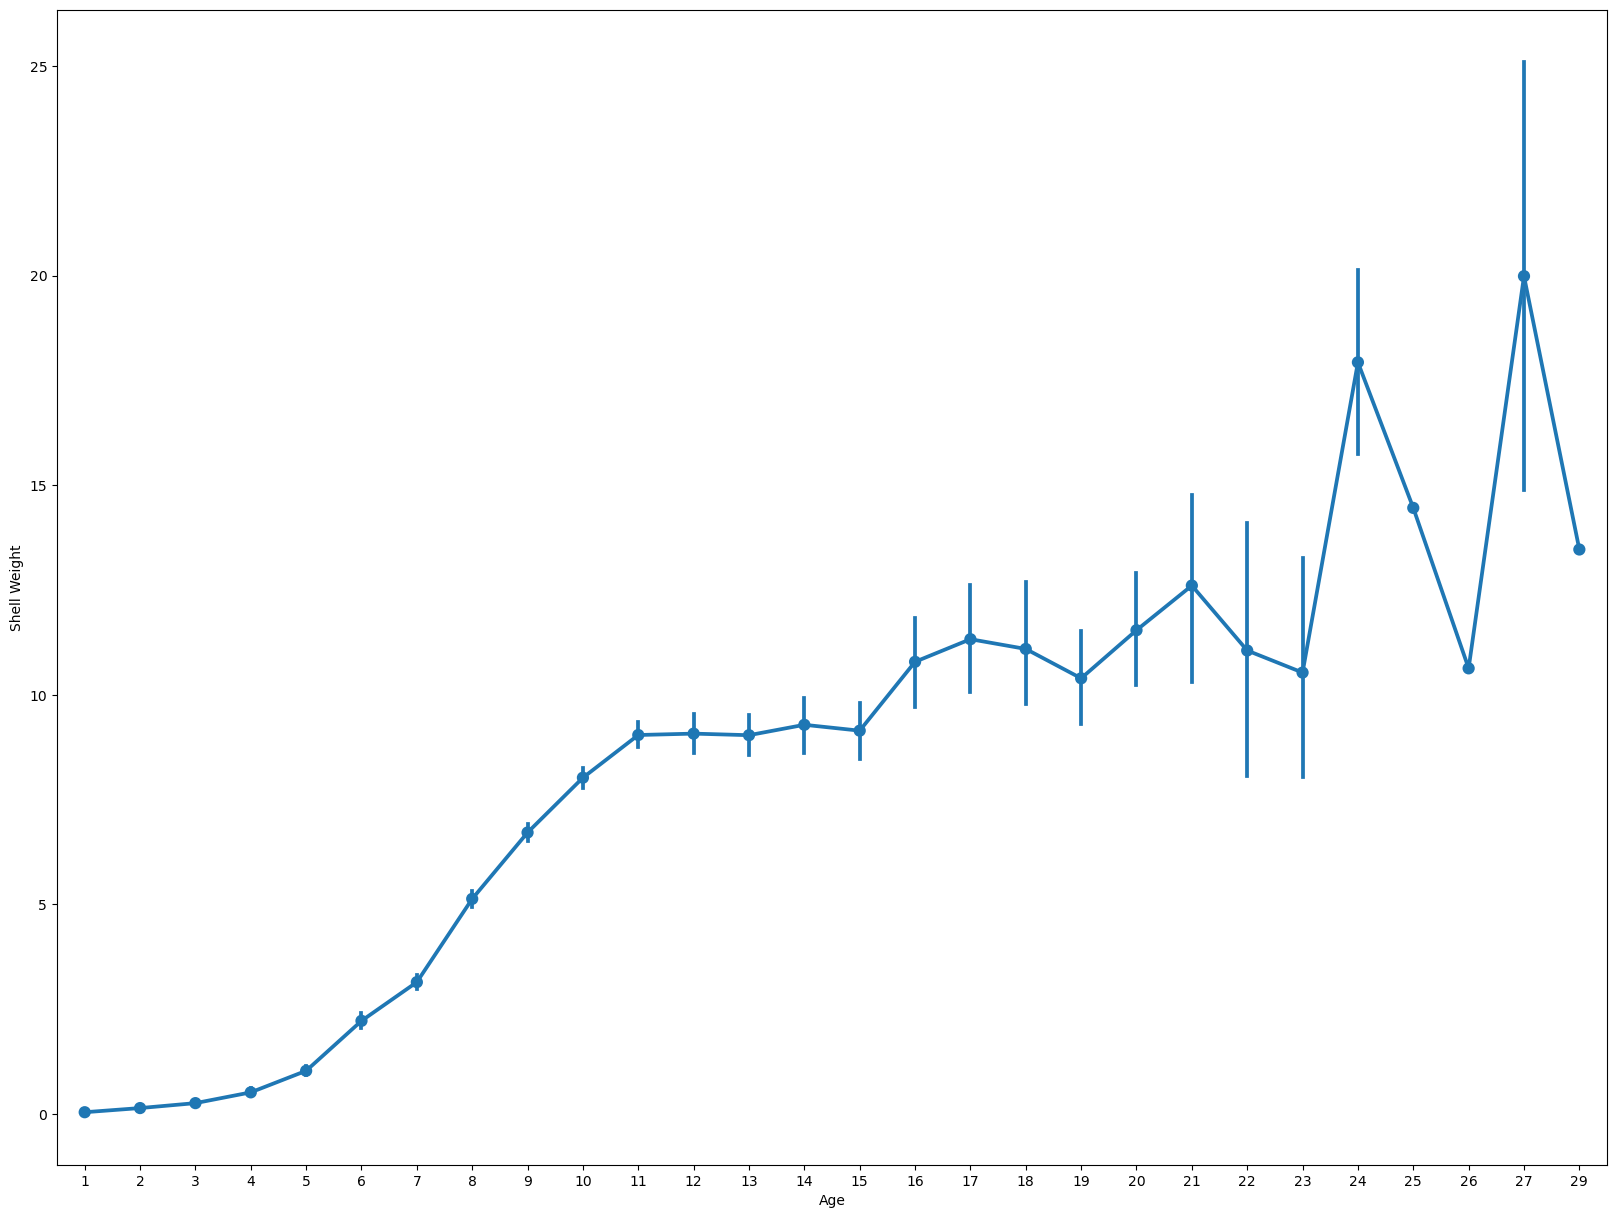

In [36]:
#using the point plot for analysis
plt.figure(figsize=(20,15))
sns.pointplot(y=crab['Shell Weight'],x=crab.Age,data=crab)
plt.show()

#the plot shows a clear variation of 'Shell Weight' with 'Age', as it is having a changing slope with changing 'Age'

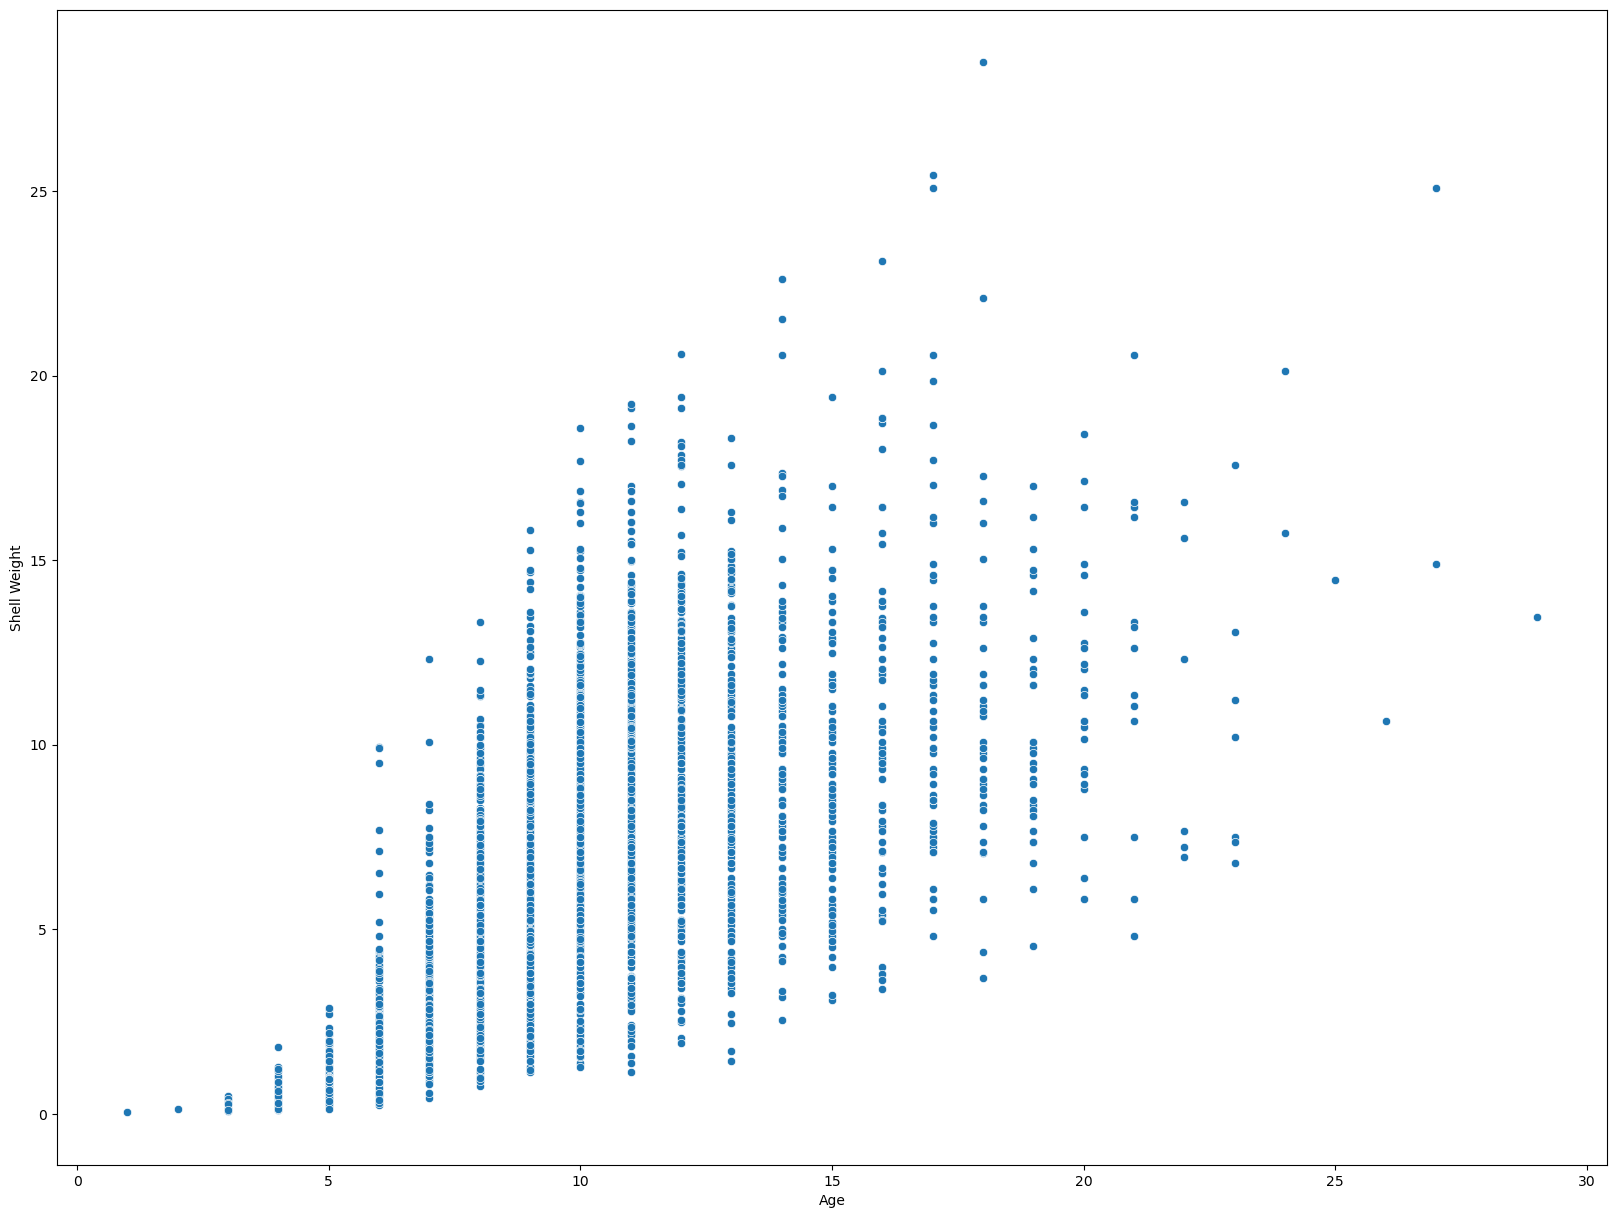

In [37]:
#using the scatter plot for analysis
plt.figure(figsize=(20,15))
sns.scatterplot(x=crab.Age,y=crab['Shell Weight'],data=crab)
plt.show()

#upto the age of 8, some crabs have the 'Viscera weight' value of near to 0
#the highest value for the 'Viscera weight' can be seen at the age of 11
#after the age of 26, no carb have 'Viscera Weight' less than 5

#as per the above plots, especially the point plot,we can see that 'Shell weight' varies non-linearly over the various values of 'Age'
#the data from the 'Shell weight' is to be kept for the model training

# Label Encoding 

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()                 #creating a short name for the LabelEncoding() as 'le'
crab['Sex'] = le.fit_transform(crab['Sex'])       #fitting the column to be transformed into the label encoder
crab['Sex'].unique()                              #checking the unique values of 'Sex', after encoding

array([0, 2, 1])

# Ip/Op Creation

In [39]:
ip=crab.drop(['Sex','Age'],axis=1)
op=crab.Age

# Applying Logistic Regression Model

In [40]:
maxia=0       #stores the random_state at which the accuracy is maximum
maxip=0       #stores the random_state at which the precision is maximum
maxir=0       #stores the random_state at which the recall is maximum
maxif=0       #stores the random_state at which the F1_score is maximum
maxacc=0      #stores the value of maximum accuracy
maxpre=0      #stores the value of maximum precision
maxrec=0      #stores the value of maximum recall
maxf1=0      #stores the value of maximum f1_score

for i in range(0,11):                        #checks random_state from 0 to 100, finds the most optimum value
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.35,random_state=i)
    #the input data and the output data are divied in categories of 'training' and 'testing'
    #while 'x' represents the training data, y represents the testing data
    #'x_train' represents input training values, x_test represents input testing values
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)    
    x_test = sc.fit_transform(x_test)
    #as the input columns are having huge variation in ranges, we scale them to a generalized range
    #StandardScaler removes the mean and scales each feature/variable to unit variance
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    #the model is trained using Logistic Regression and the data is fitted into the model
    yp = lr.predict(x_test)
    #prediction is made using the testing data
    from sklearn import metrics
    acc = metrics.accuracy_score(y_test,yp)
    if acc>maxacc:
        maxacc=acc            #stores the maximum value for 'accuracy'
        maxia=i
    pre = metrics.precision_score(y_test,yp,average='weighted')
    if pre>maxpre:
        maxpre=pre           #stores the maximum value for 'precision'
        maxip=i
    recall = metrics.recall_score(y_test,yp,average='macro')
    if recall>maxrec:
        maxrec=recall         #stores the maximum value for 'recall'
        maxir=i
    f1 = metrics.f1_score(y_test,yp,average='macro')
    if f1>maxf1:
        maxf1=f1              #stores the maximum value for 'f1-score'
        maxif=i
print('\n\nMax Accuracy at',maxia,'random state with Accuracy=',maxacc)
print('\nMax Precision at',maxip,'random state with Precision=',maxpre)
print('\nMax Recall at',maxir,'random state with Recall=',maxrec)
print('\nMax F1-score at',maxif,'random state with F1-score=',maxf1)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_



Max Accuracy at 5 random state with Accuracy= 0.2780630961115187

Max Precision at 5 random state with Precision= 0.24560686837244963

Max Recall at 5 random state with Recall= 0.13370729563000247

Max F1-score at 5 random state with F1-score= 0.12957764856276927


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Applying K-Nearest Neighbors

In [41]:
maxia=0       #stores the random_state at which the accuracy is maximum
maxif=0       #stores the random_state at which the f1_score is maximum
maxja=0       #stores the test_size at which the accuracy is maximum
maxjf=0       #stores the test_size at which the f1_score is maximum
maxka=0       #stores the n_neighbors value at which the accuracy is maximum
maxkf=0       #stores the n_neighbors value at which the f1_score is maximum
maxacc=0      #stores the value of maximum accuracy
maxf1=0      #stores the value of maximum f1_score

for j in [0.2,0.25,0.3]:                                     #checks the test_size in a certain range
    for i in range(0,31):                                    #checks random_state from 0 to 30
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=j,random_state=i)
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)    
        x_test = sc.fit_transform(x_test)
        for k in range(1,10):                                #checks k_neighbors from 0 to 10
            from sklearn.neighbors import KNeighborsClassifier
            alg = KNeighborsClassifier(n_neighbors=k)
            alg.fit(x_train,y_train)
            yp=alg.predict(x_test)        #predict the data
            from sklearn import metrics
            acc = metrics.accuracy_score(y_test,yp)
            if acc>maxacc:
                maxacc=acc               #stores the maximum value for 'accuracy'
                maxia=i
                maxja=j
                maxka=k
            f1 = metrics.f1_score(y_test,yp,average='macro')
            if f1>maxf1:
                maxf1=f1                #stores the maximum value for 'f1-score'
                maxif=i
                maxjf=j
                maxkf=k
print('\n\nMax Accuracy at',maxia,'random state, at',maxka,'n_neighbors and',maxja,'test size with Accuracy=',maxacc)
print('\nMax Precision at',maxif,'random state, at',maxkf,'n_neighbors and',maxjf,'test size with Precision=',maxf1)

#KNN is based on similarity concept
#euclidean distance is used to find the density of nearby points, based on their category
#the optimum distance is used, and the majority categorical points tell about the new point category
#examples of this model are recommendation system, search engine etc



Max Accuracy at 21 random state, at 8 n_neighbors and 0.25 test size with Accuracy= 0.26899383983572894

Max Precision at 27 random state, at 6 n_neighbors and 0.2 test size with Precision= 0.1623188634689554


# Applying Support Vector Machines

In [42]:
maxia=0       #stores the random_state at which the accuracy is maximum
maxif=0       #stores the random_state at which the f1_score is maximum
maxja=0       #stores the test_size at which the accuracy is maximum
maxjf=0       #stores the test_size at which the f1_score is maximum
maxka=0       #stores value of error optimization factor for which the accuracy is maximum
maxkf=0       #stores value of error optimization factor for which the f1_score is maximum
maxla=0       #stores value of kernel coefficient for which the accuracy is maximum
maxlf=0       #stores value of kernel coefficient for which the f1_score is maximum
maxacc=0      #stores the value of maximum accuracy
maxf1=0       #stores the value of maximum f1_score

for j in [0.25,0.3,0.35]:                                        #checks the test size for values of 0.25, 0.3 and 0.35
    for i in range(0,11):                                        #checks random_state from 0 to 10
        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=j,random_state=i)
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)    
        x_test = sc.fit_transform(x_test)
        for k in [400,500]:                       #checks for 'penalty parameter' for values of 400 and 500
            for l in [0.01, 0.1,1]:                 #checks for 'kernel coefficient' for values 0.01 and 0.1
                from sklearn import svm
                alg = svm.SVC(kernel='rbf',C=k,gamma=l)
                alg.fit(x_train,y_train)
                yp=alg.predict(x_test)            #predict the data
                from sklearn import metrics
                acc = metrics.accuracy_score(y_test,yp)
                if acc>maxacc:
                    maxacc=acc                    #stores the maximum value for 'accuracy'
                    maxia=i
                    maxja=j
                    maxka=k
                    maxla=l
                f1 = metrics.f1_score(y_test,yp,average='macro')
                if f1>maxf1:
                    maxf1=f1                      #stores the maximum value for 'f1-score'
                    maxif=i
                    maxjf=j
                    maxkf=k
                    maxlf=l
print('\n\nMax Accuracy at',maxia,'random state, at',maxka,'penalty parameter,',maxla,'kernel coefficient',maxja,'test size with Accuracy=',maxacc)
print('\nMax Precision at',maxif,'random state, at',maxkf,'penalty parameter,',maxlf,'kernel coefficient',maxjf,'test size with F1_Score=',maxf1)

#SVM->support vector machine
#classifies categories using hyperline(best-fit line)->separates group
#initially a random line is generated for finding the support vector
#hyperline-> perpendicular distance from support vectors, also known as margin, should be maximum
#support vectors-> points of categories, close to the hyperline or hyper plane
#to convert 1-d points to 2-d points, we use kernel functions:
#linear, polynomial and rbf(radial basis function)
#for 3-d, we convert the 2-d, and then use a hyper-plane
#in svm, the execution time is more
#for complex data, yeild better results
#can be used for both regression and classification
#'gamma'-> kernel coefficient 
#'C'->error optimization/penalty parameter->generally between 1 to 1000



Max Accuracy at 5 random state, at 400 penalty parameter, 0.01 kernel coefficient 0.25 test size with Accuracy= 0.2926078028747433

Max Precision at 5 random state, at 500 penalty parameter, 0.1 kernel coefficient 0.25 test size with F1_Score= 0.16268826791879493
